<a href="https://colab.research.google.com/github/piantic/Santander-Product-Recommendation-Competition/blob/master/01_EDA(baseline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.구글 드라이브 연동


In [1]:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools

    !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

    !apt-get update -qq 2>&1 > /dev/null

    !apt-get -y install -qq google-drive-ocamlfuse fuse

    from google.colab import auth

    auth.authenticate_user()

    from oauth2client.client import GoogleCredentials

    creds = GoogleCredentials.get_application_default()

    import getpass

    !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL

    vcode = getpass.getpass()

    !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.13-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.13-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redir

In [0]:
!mkdir -p kaggle

!google-drive-ocamlfuse kaggle

##1.2. csv 폴더 확인

In [14]:
!ls ./kaggle/kaggle/02_Santander/Data/train_ver2.csv
path = './kaggle/kaggle/02_Santander/Data/train_ver2.csv'

./kaggle/kaggle/02_Santander/Data/train_ver2.csv


#2. EDA 코드 작성

##2.1. import 및 데이터셋 로드

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [15]:
train = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##2.2. 데이터 정보 확인

In [16]:
train.shape

(13647309, 48)

In [17]:
for col in train.columns:
  print('{}\n'.format(train[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [19]:
numCols = [col for col in train.columns[:24] if train[col].dtype in ['int64', 'float64']]
type(numCols)

list

In [20]:
train[numCols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [21]:
objCols = [col for col in train.columns[:24] if train[col].dtype in ['object']ㄹ
train[objCols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


###2.2.1. 범주형(object) 데이터 분석

In [22]:
for col in objCols:
  uniq = np.unique(train[col].astype(str))
  print('-' * 50)
  print('# col {}, len_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, len_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, len_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, len_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' '

##2.3. 데이터 시각화

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###2.3.1. 막대 그래프(Histogram) 시각화

--------------------------------------------------
col :  fecha_dato


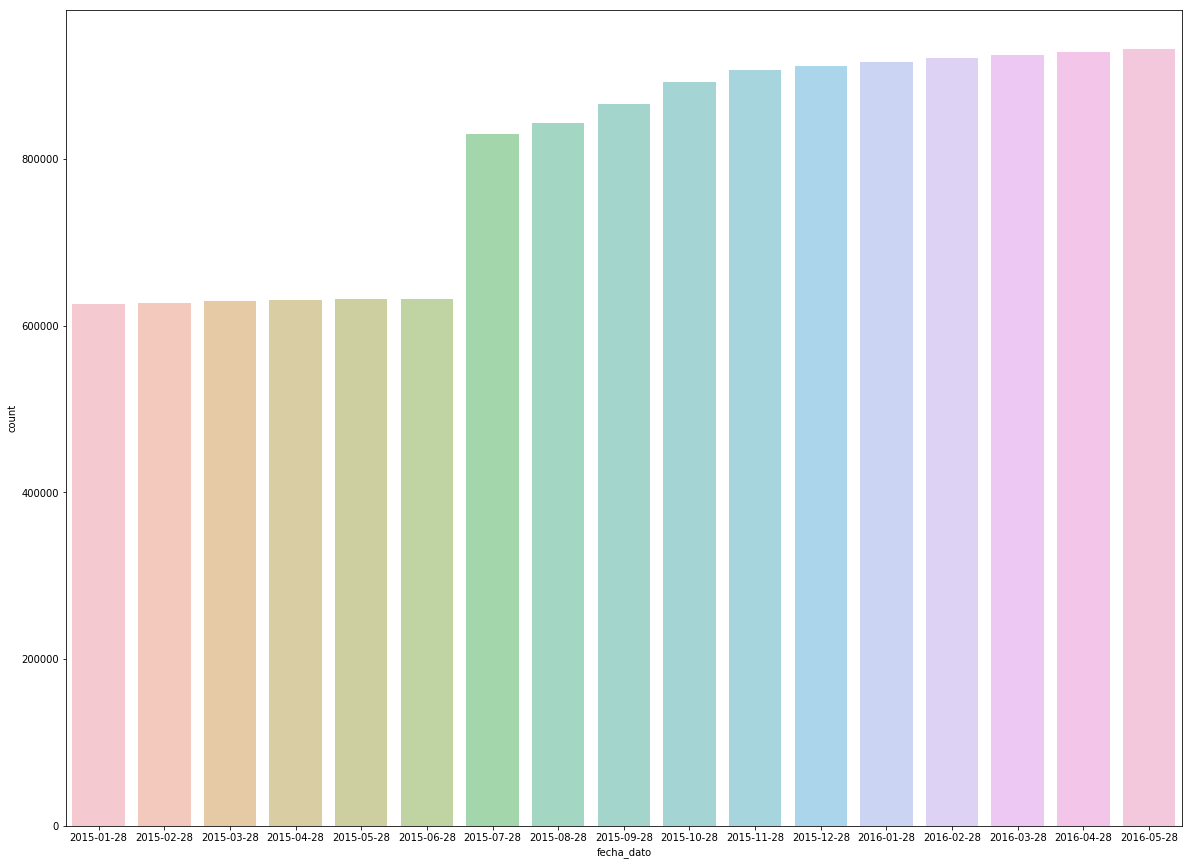

--------------------------------------------------
col :  ind_empleado


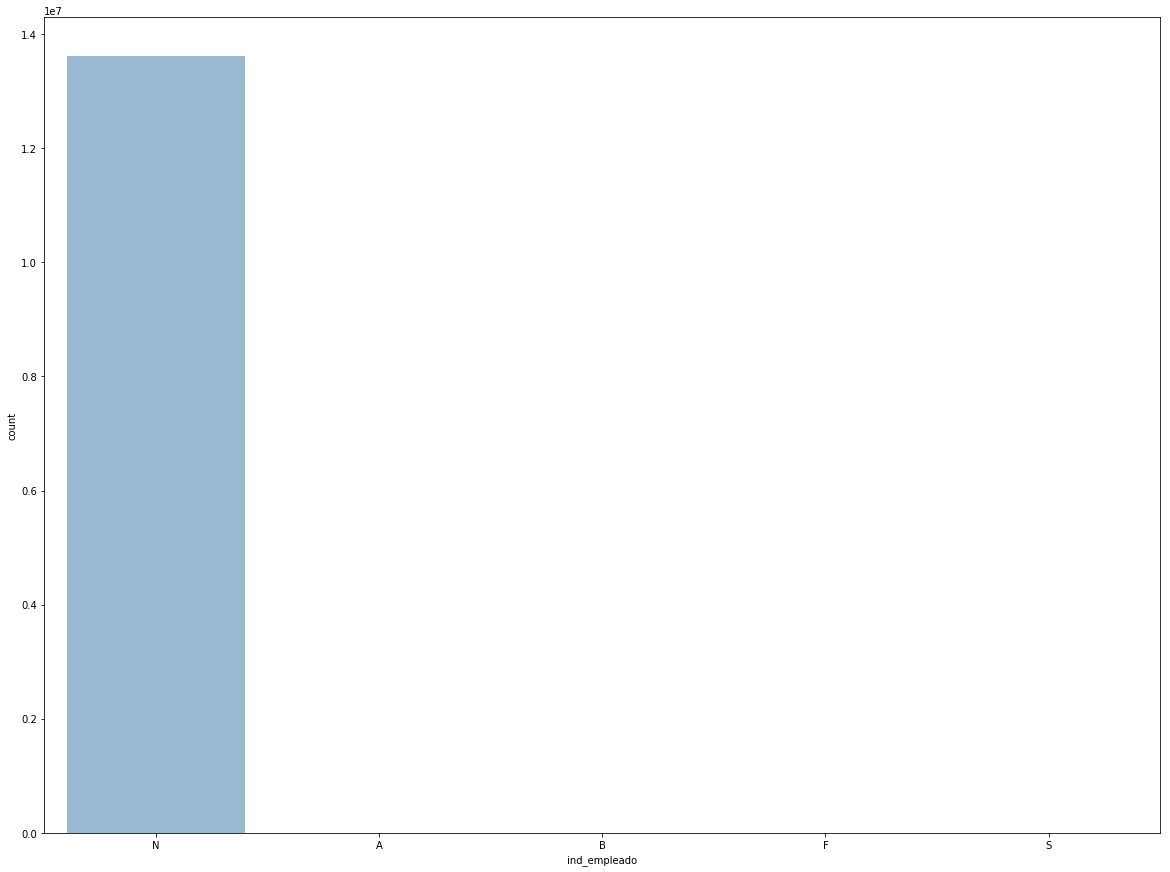

--------------------------------------------------
col :  pais_residencia


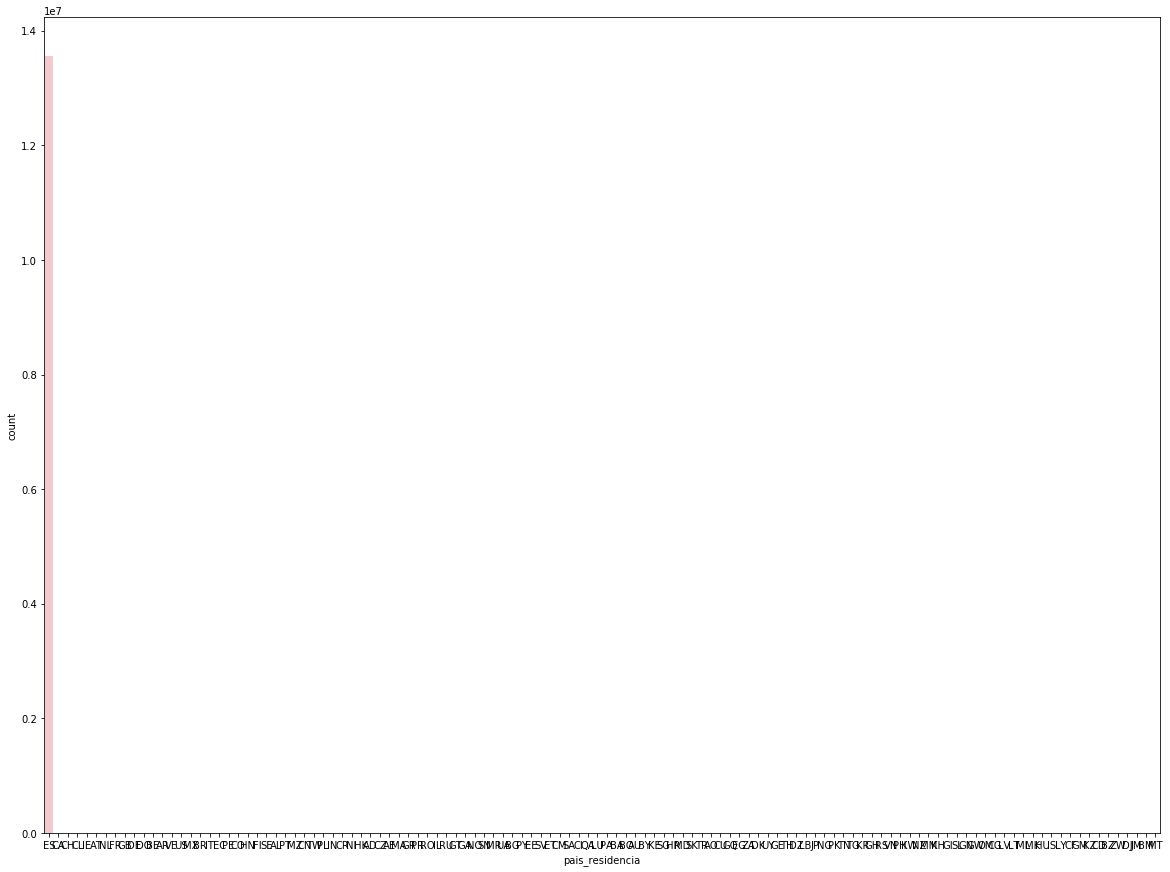

--------------------------------------------------
col :  sexo


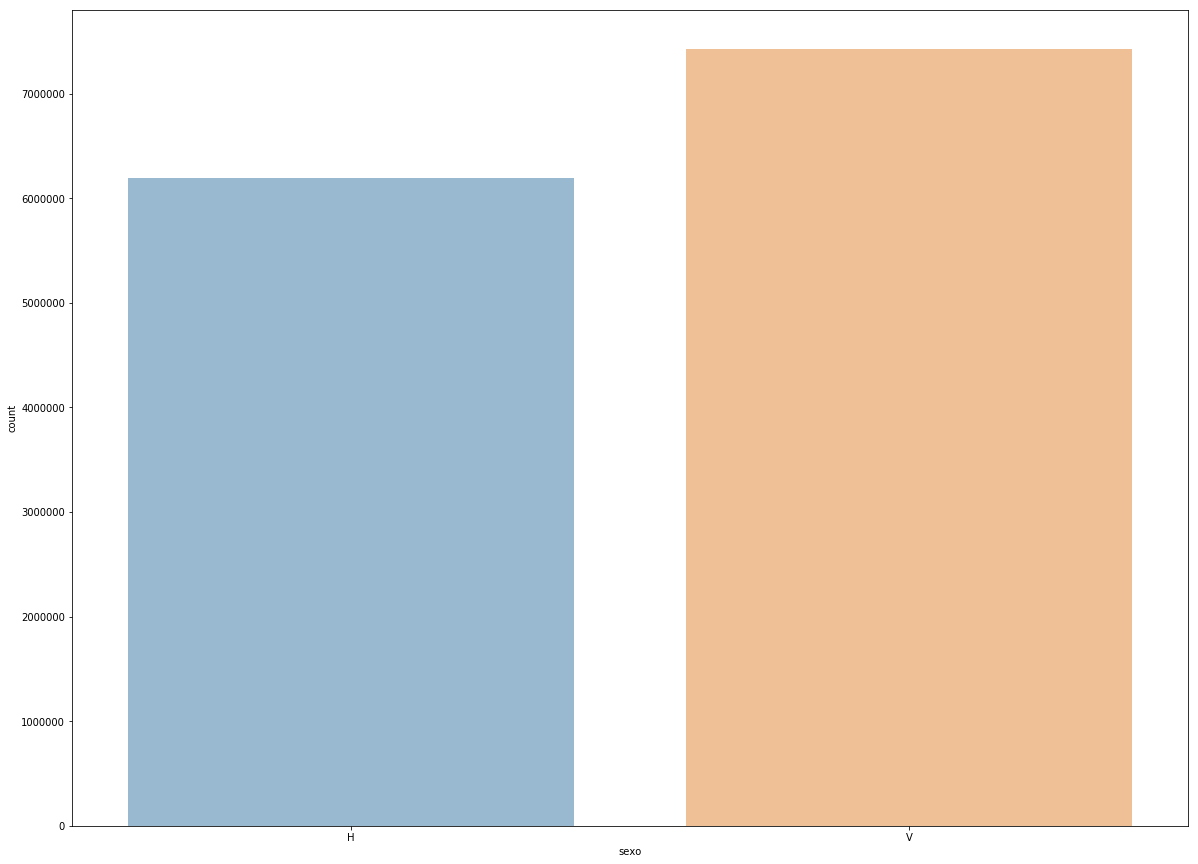

--------------------------------------------------
col :  age


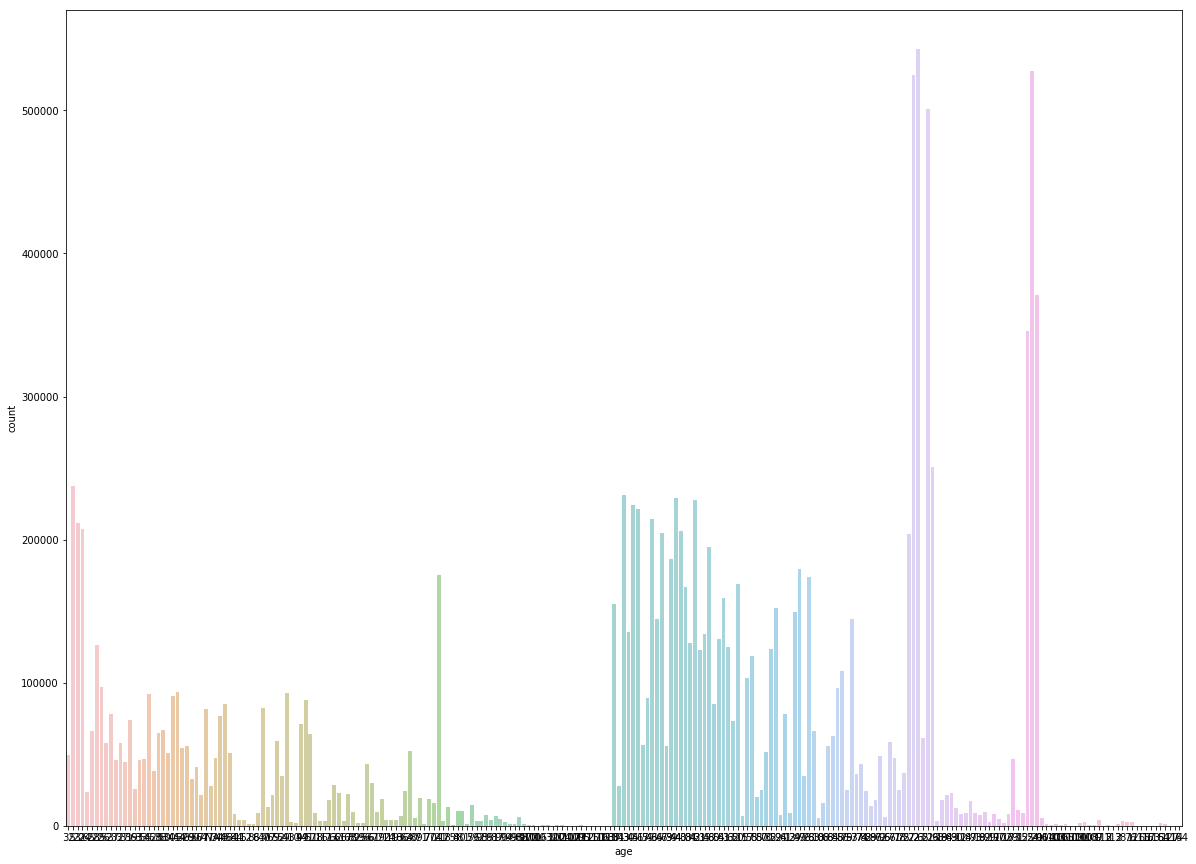

--------------------------------------------------
col :  fecha_alta


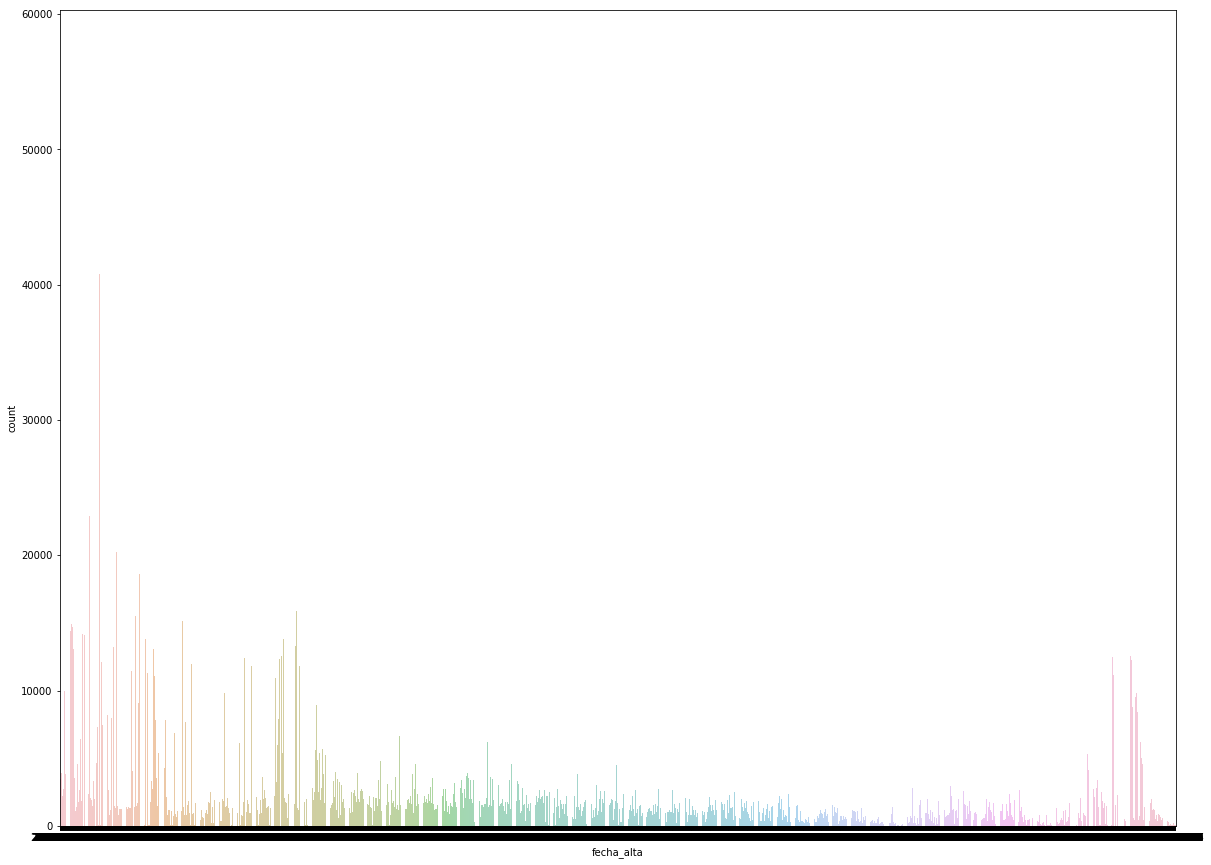

--------------------------------------------------
col :  ind_nuevo


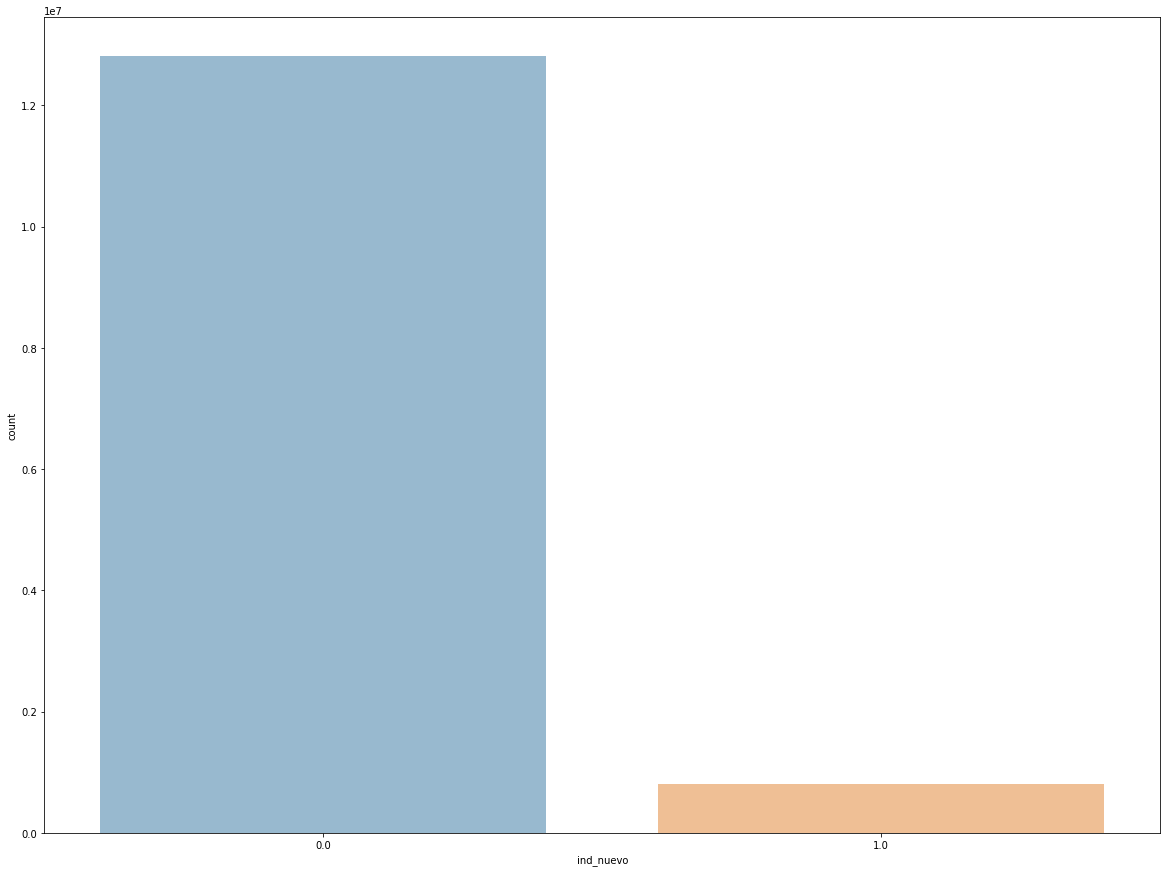

--------------------------------------------------
col :  antiguedad


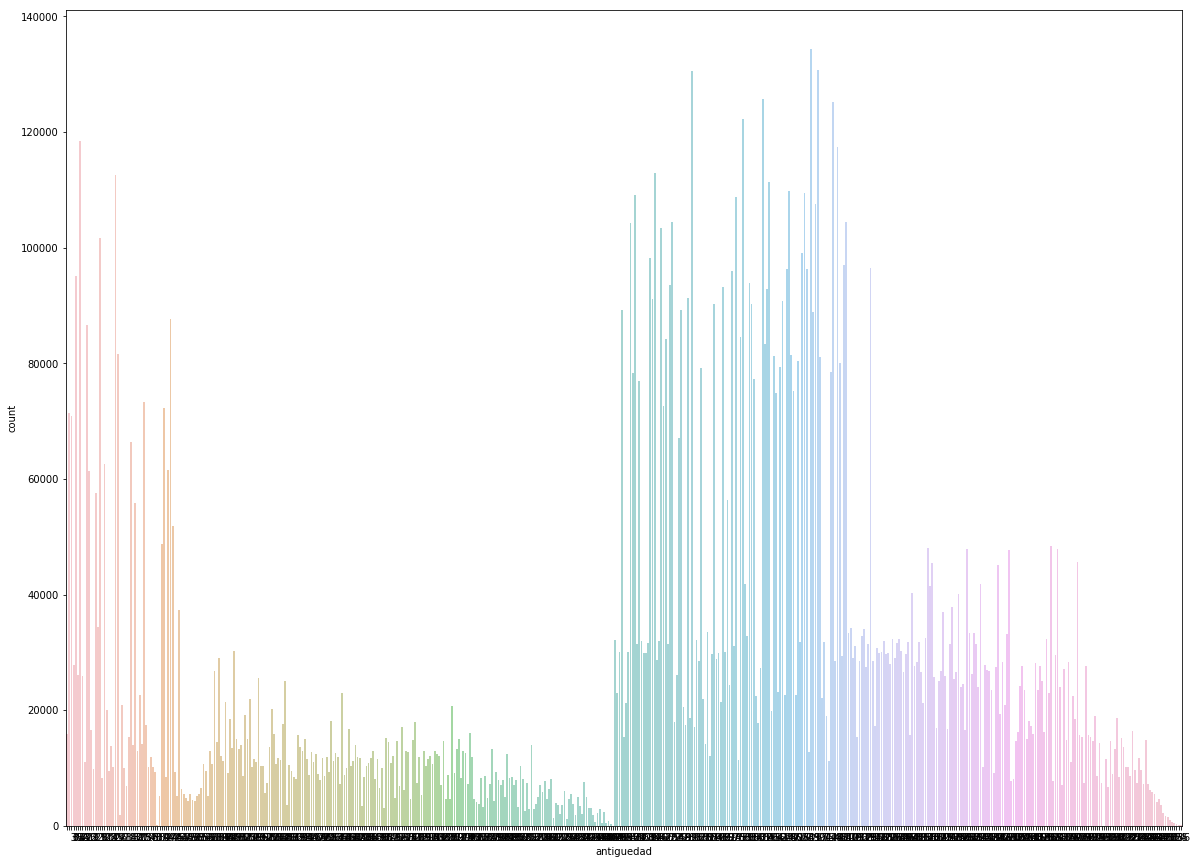

--------------------------------------------------
col :  indrel


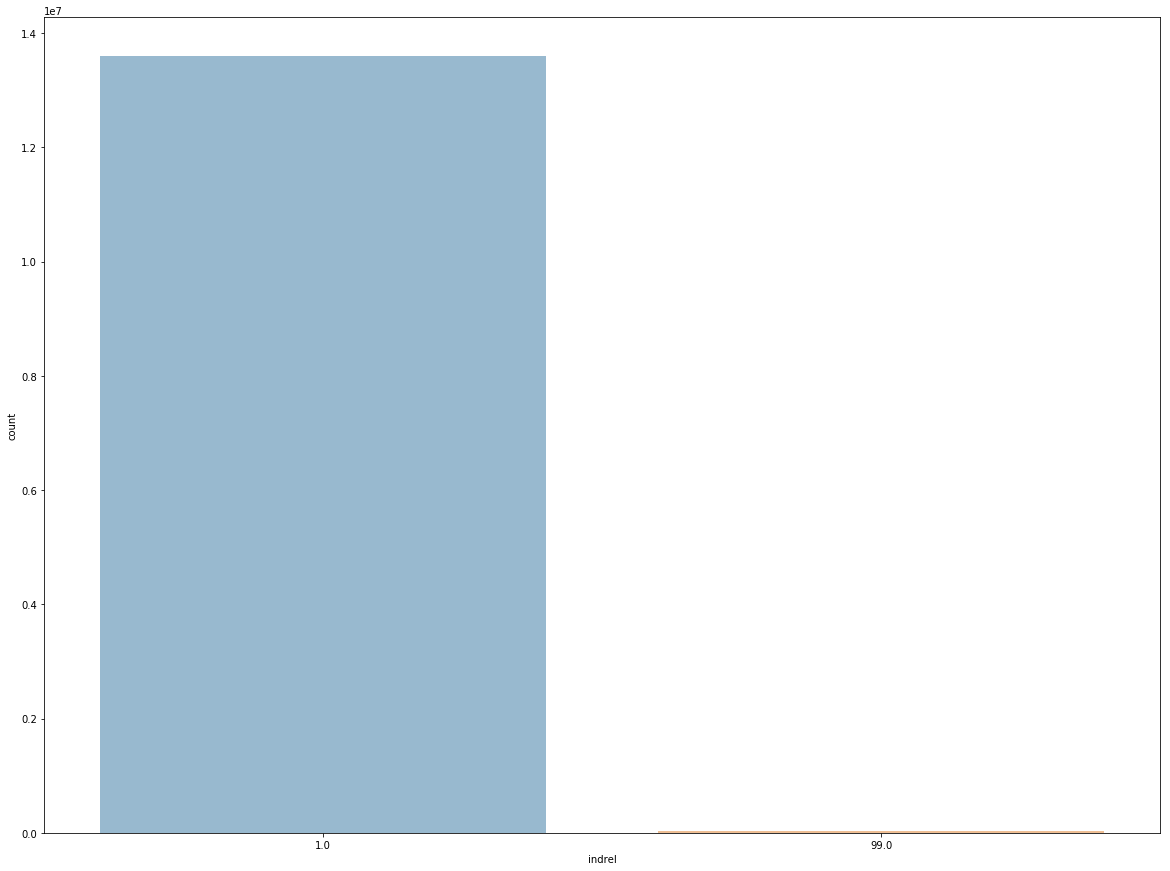

--------------------------------------------------
col :  ult_fec_cli_1t


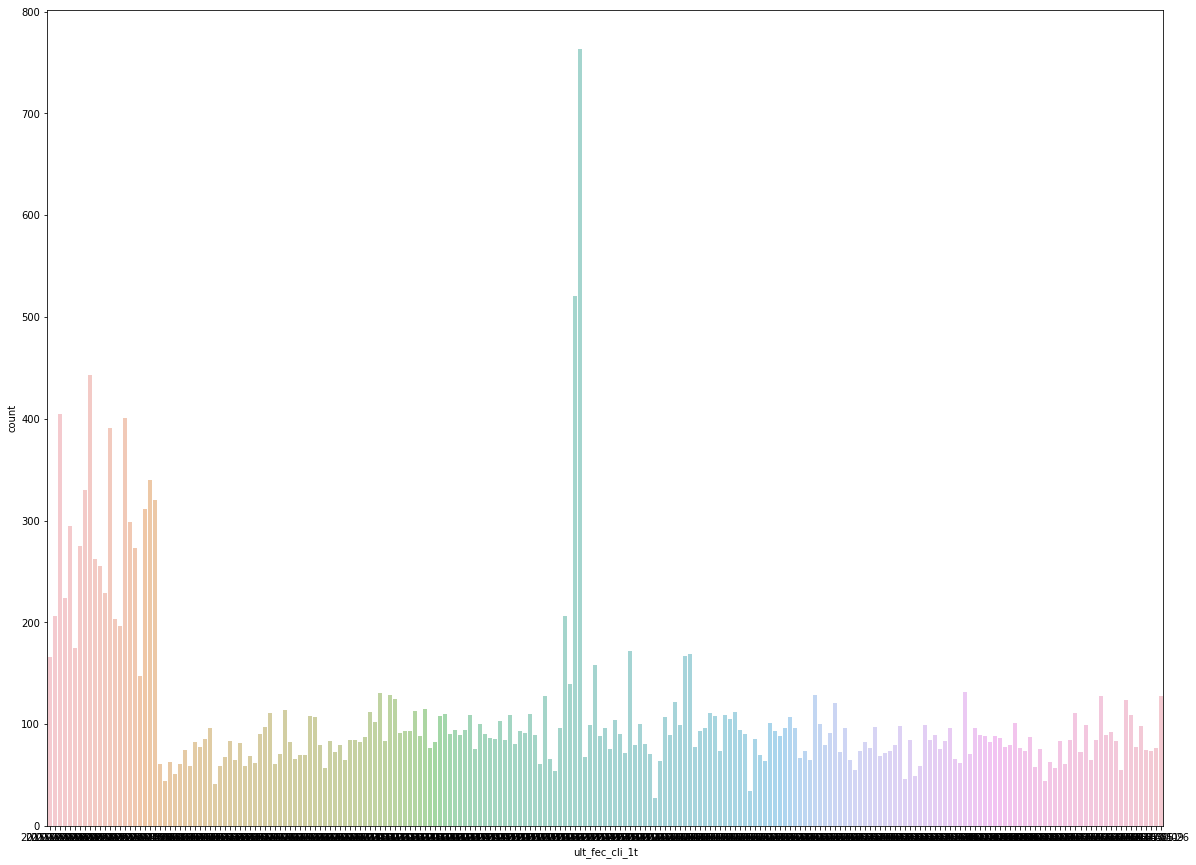

--------------------------------------------------
col :  indrel_1mes


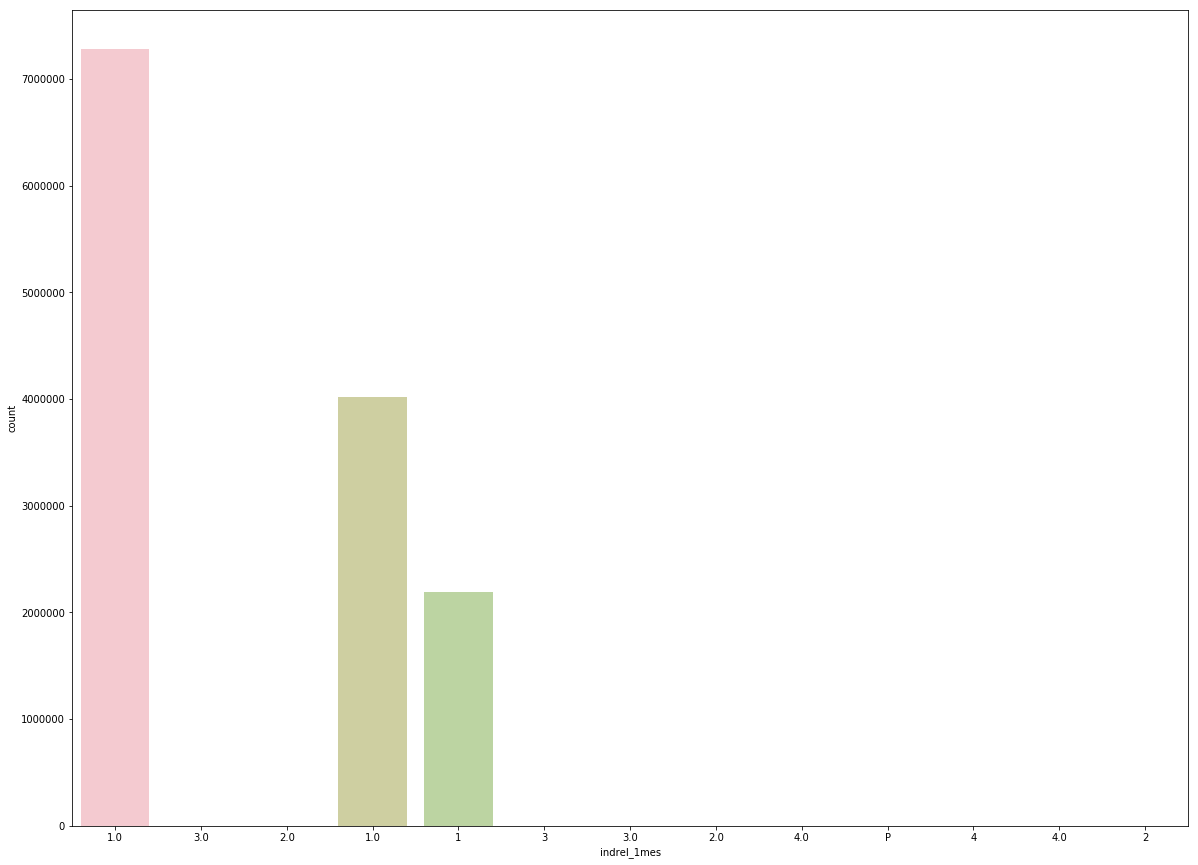

--------------------------------------------------
col :  tiprel_1mes


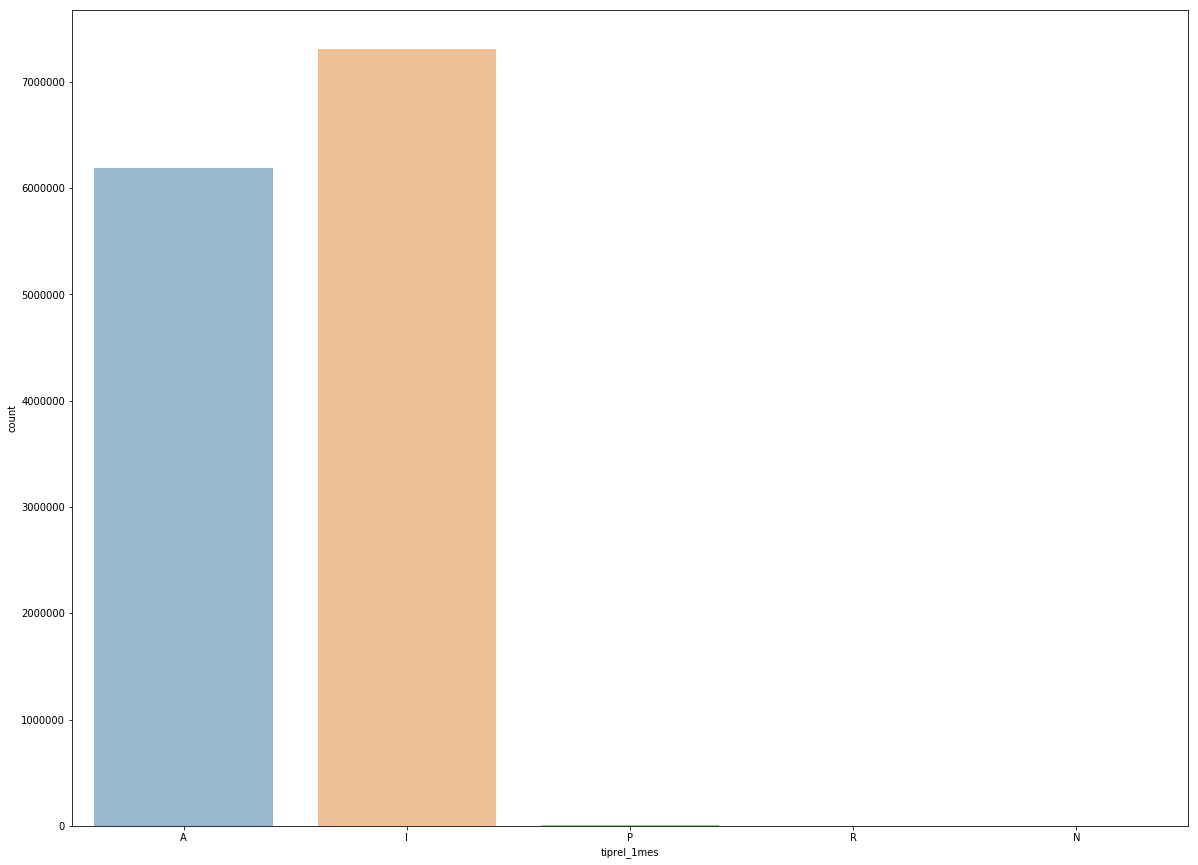

--------------------------------------------------
col :  indresi


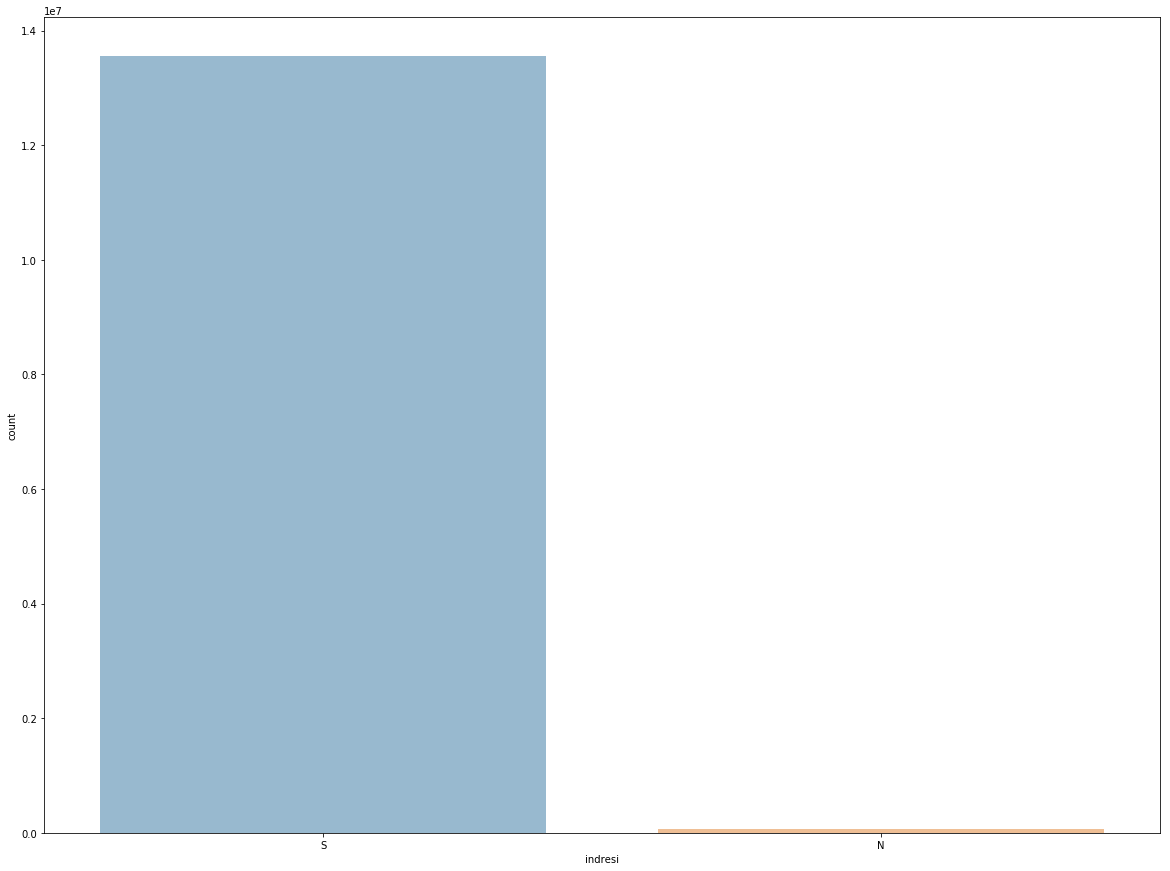

--------------------------------------------------
col :  indext


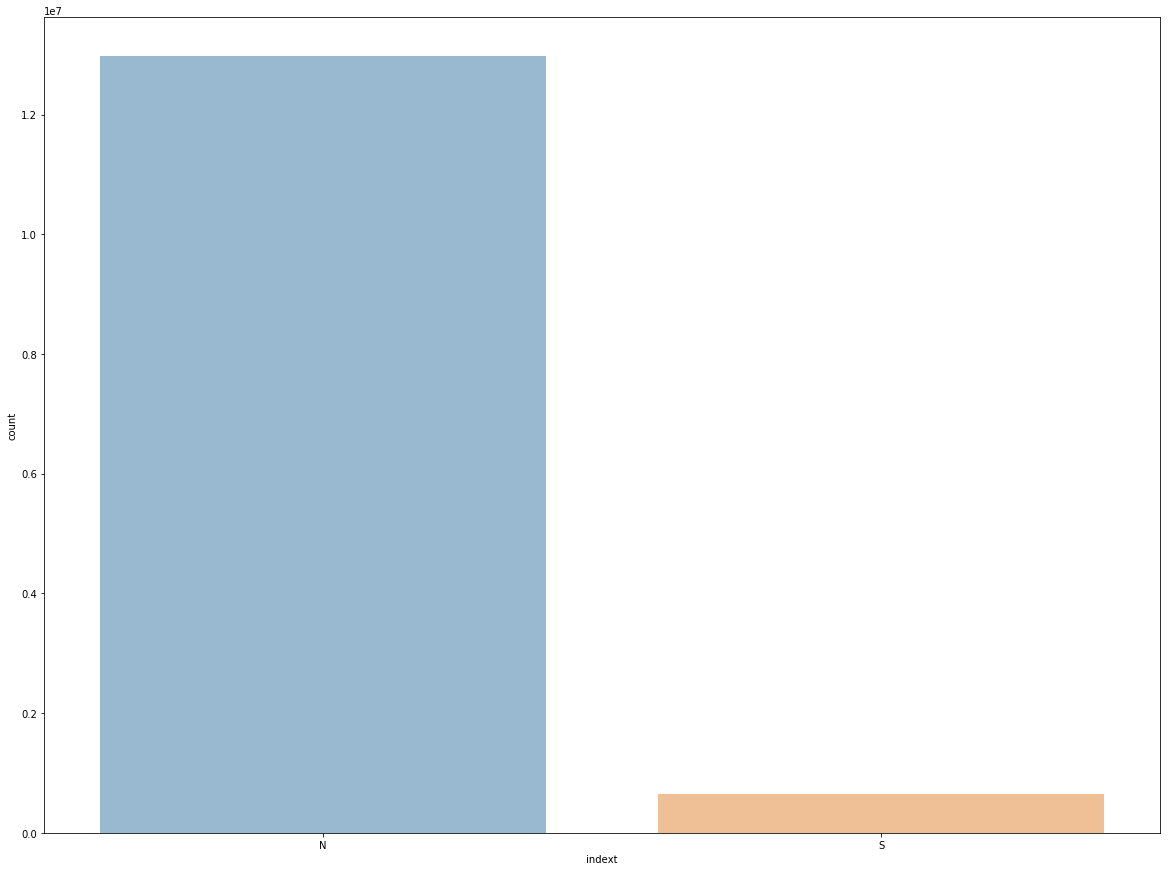

--------------------------------------------------
col :  conyuemp


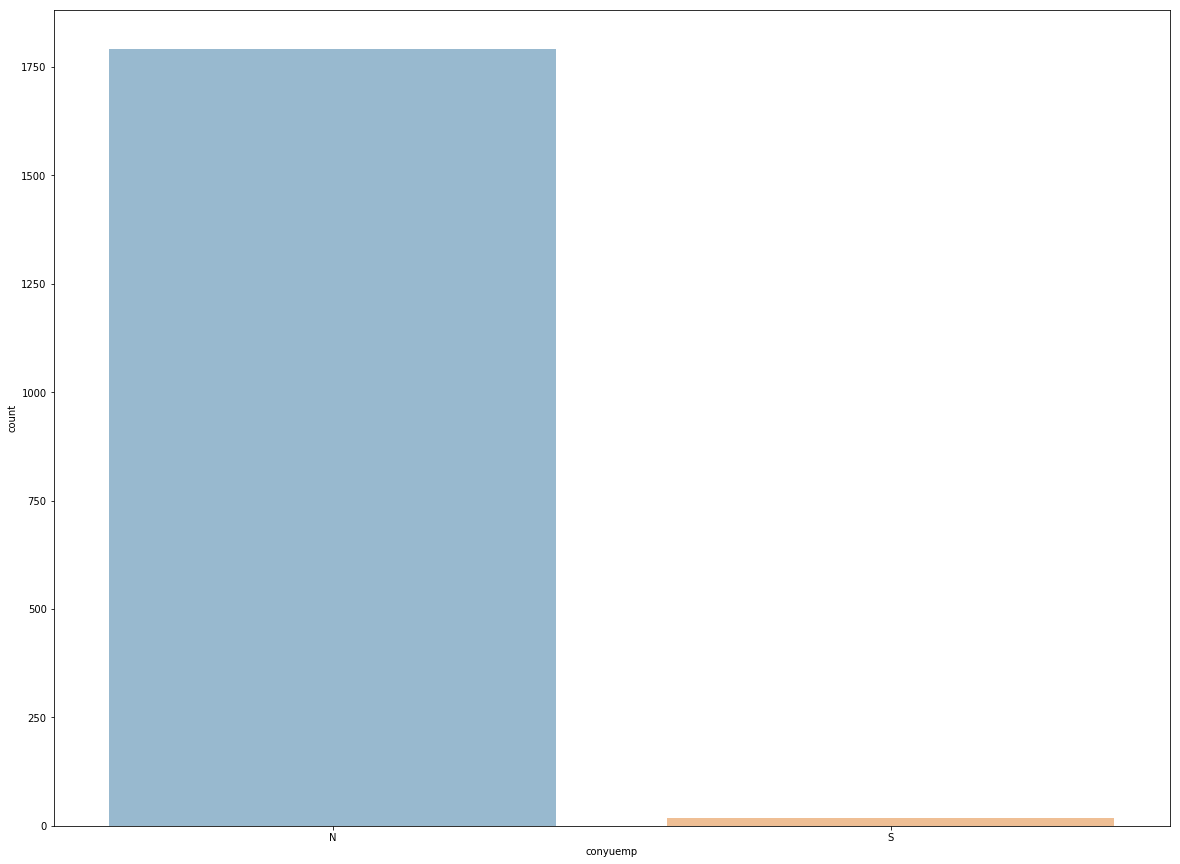

--------------------------------------------------
col :  canal_entrada


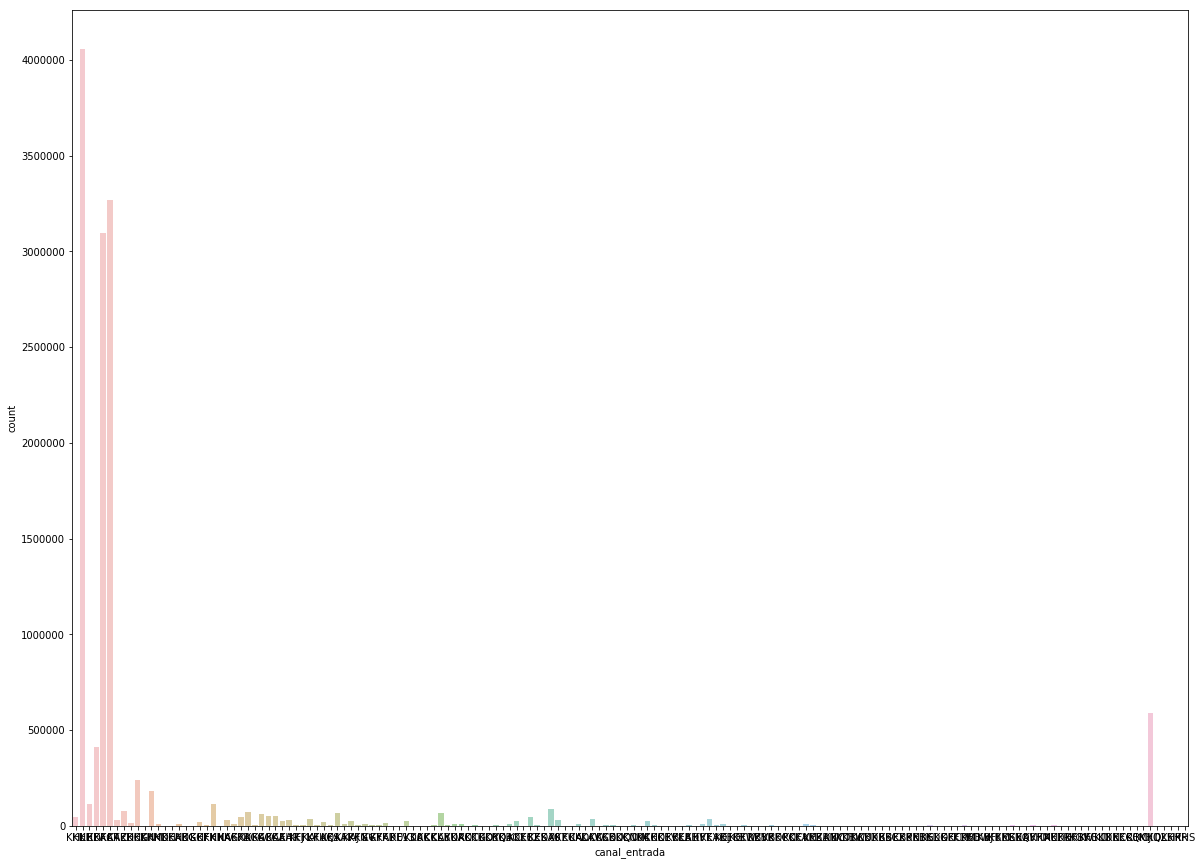

--------------------------------------------------
col :  indfall


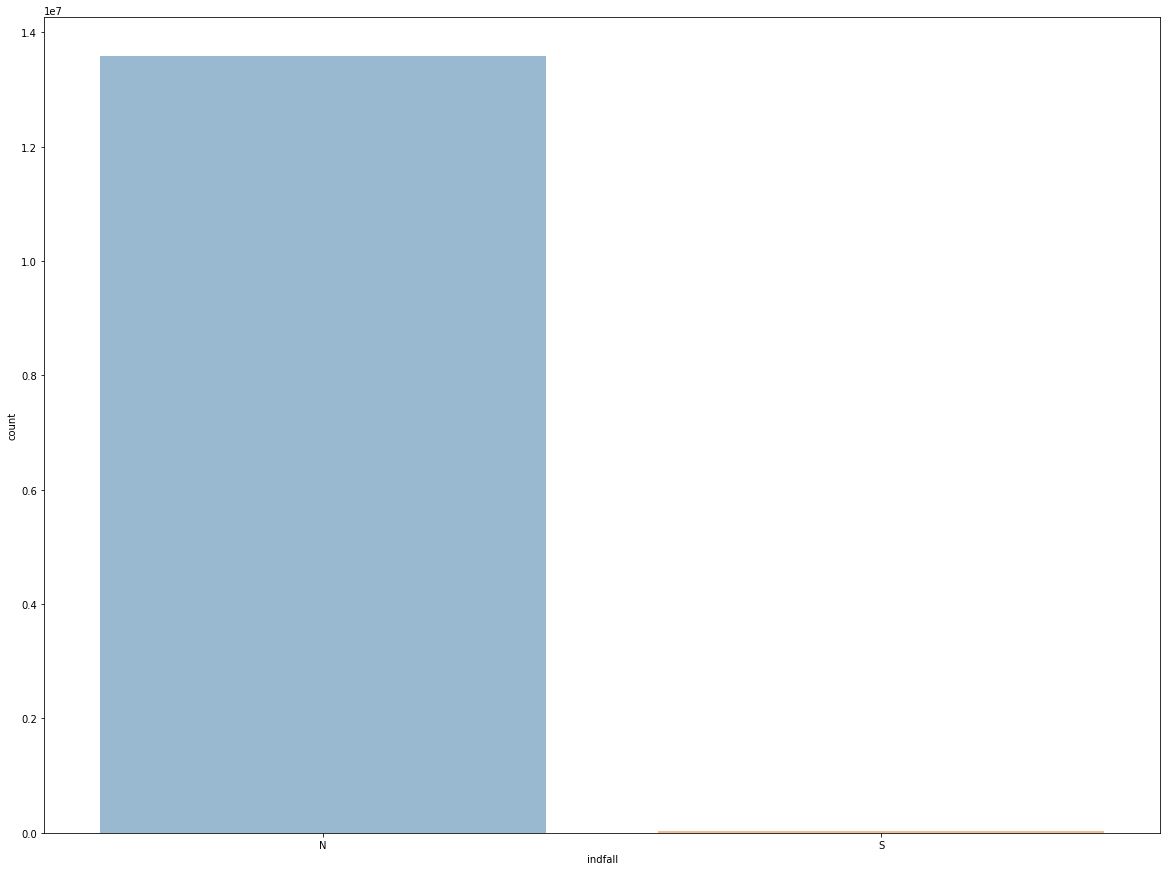

--------------------------------------------------
col :  tipodom


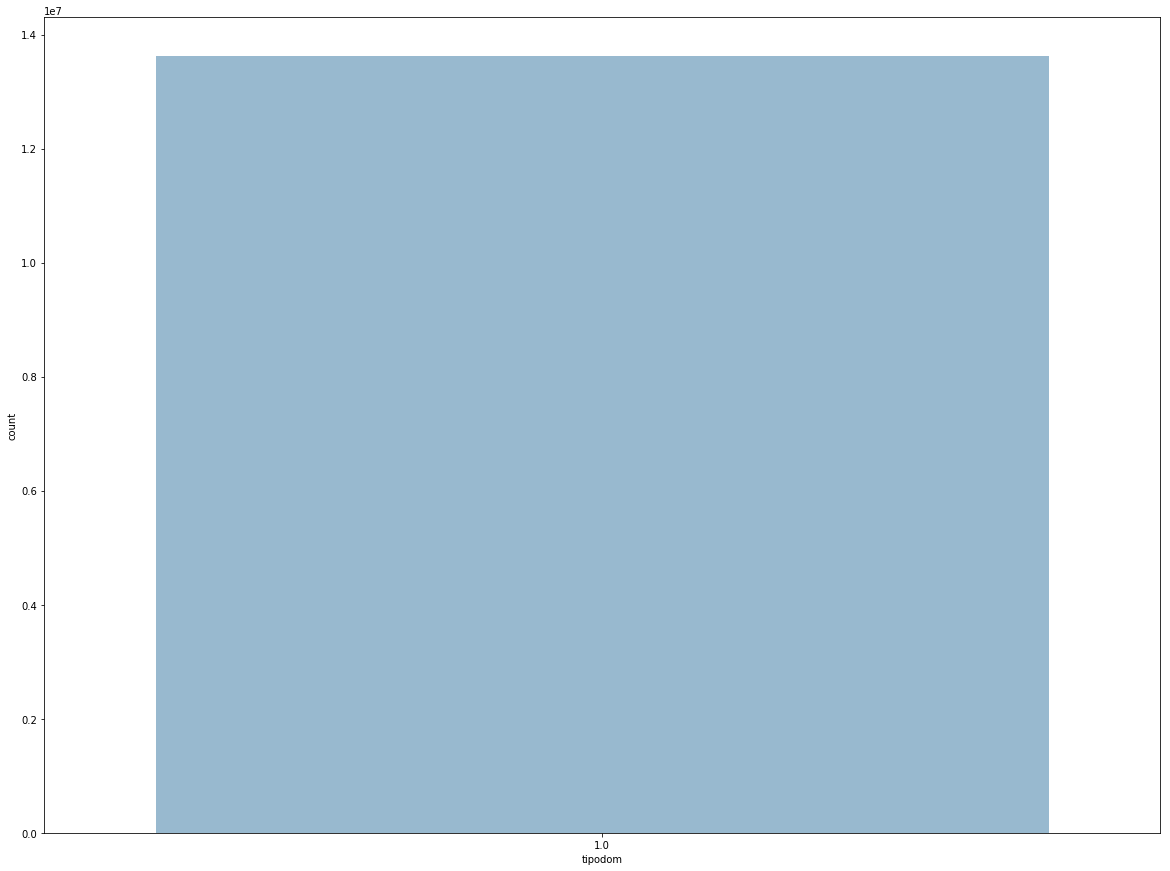

--------------------------------------------------
col :  cod_prov


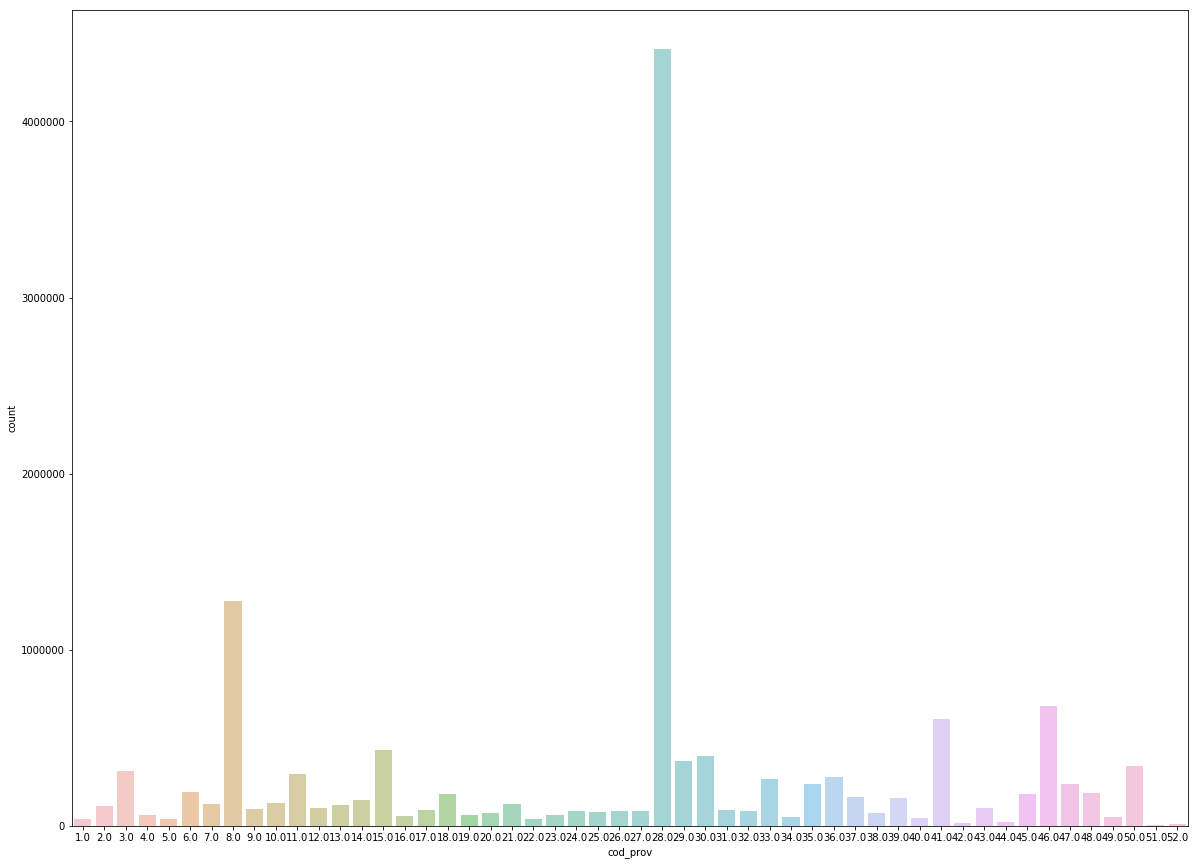

--------------------------------------------------
col :  nomprov


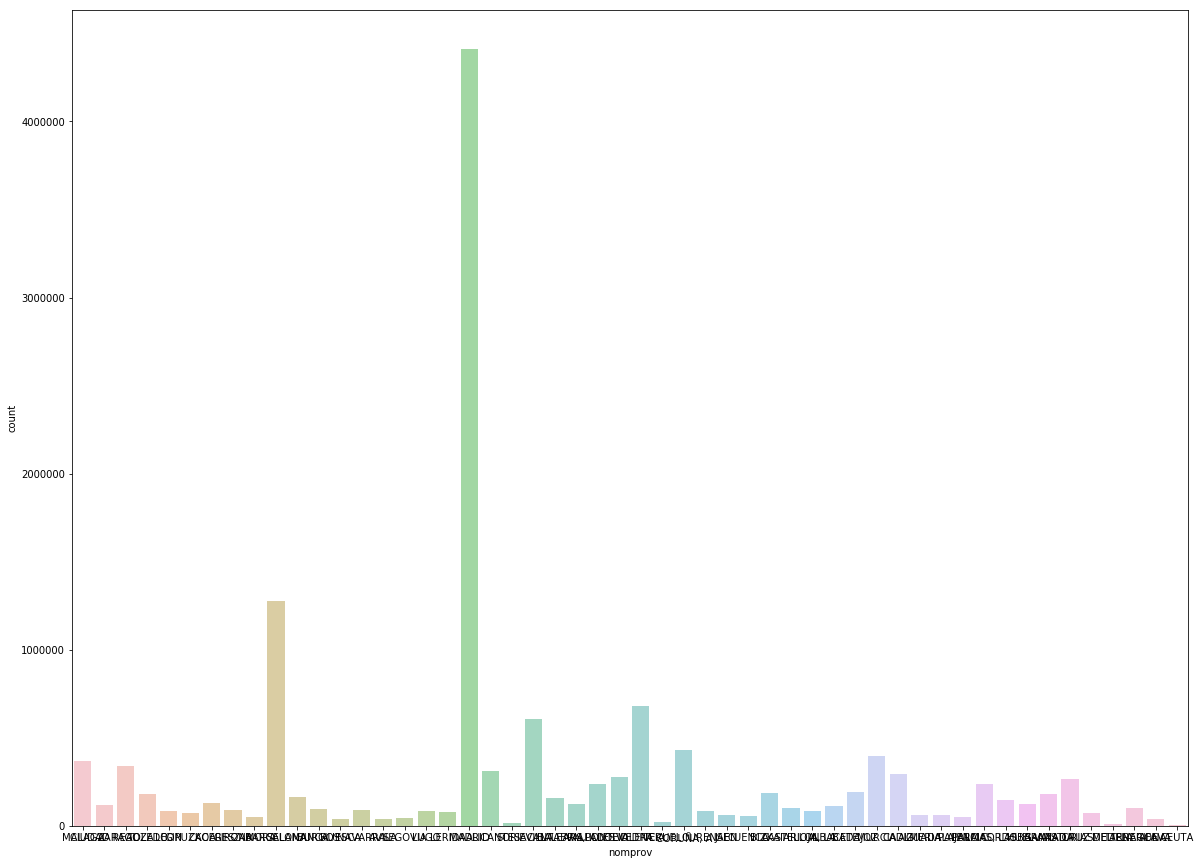

--------------------------------------------------
col :  ind_actividad_cliente


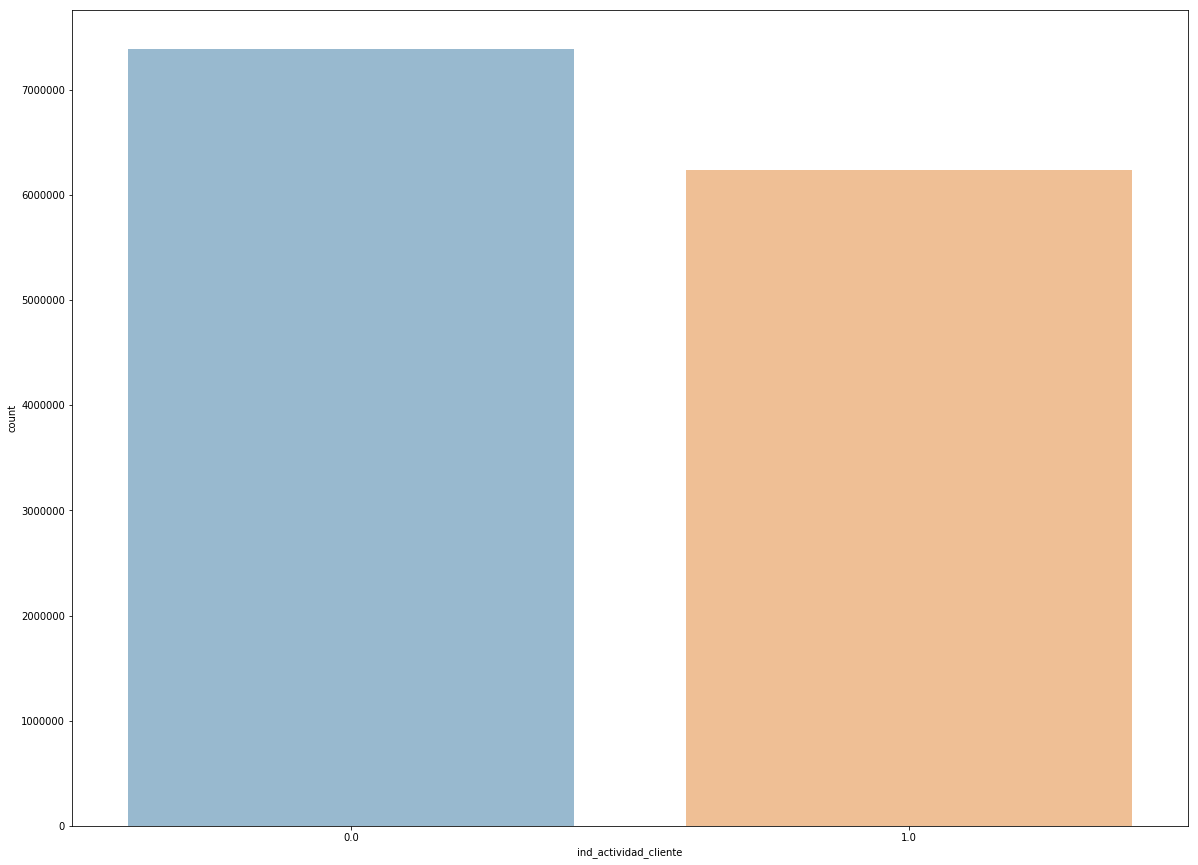

--------------------------------------------------
col :  segmento


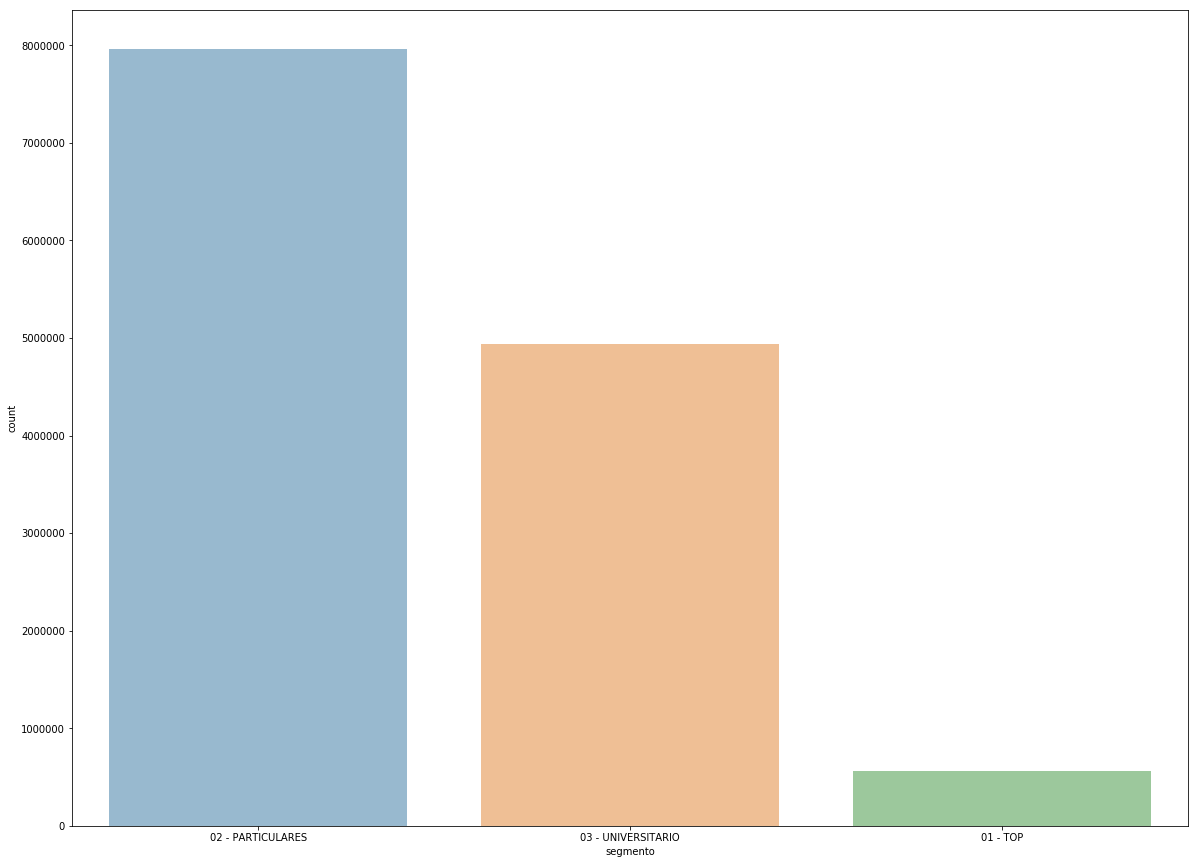

--------------------------------------------------
col :  ind_ahor_fin_ult1


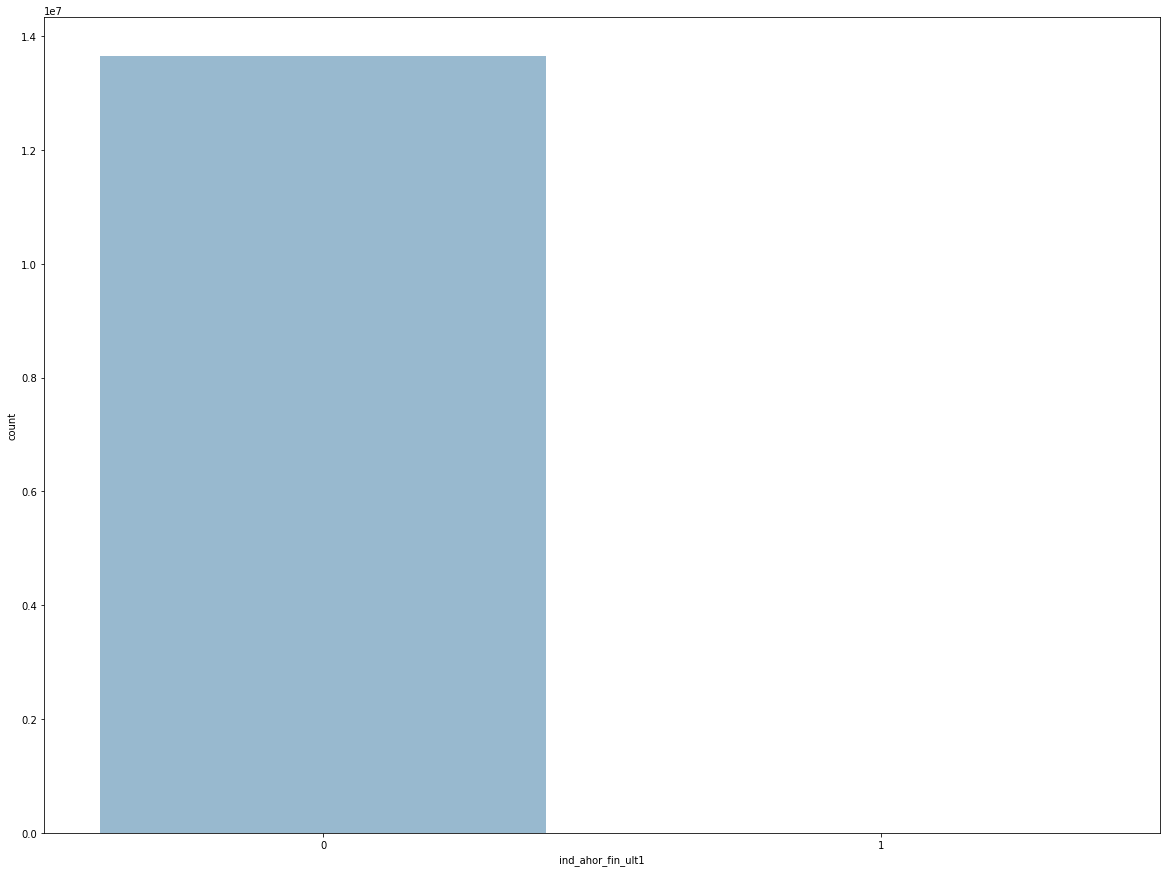

--------------------------------------------------
col :  ind_aval_fin_ult1


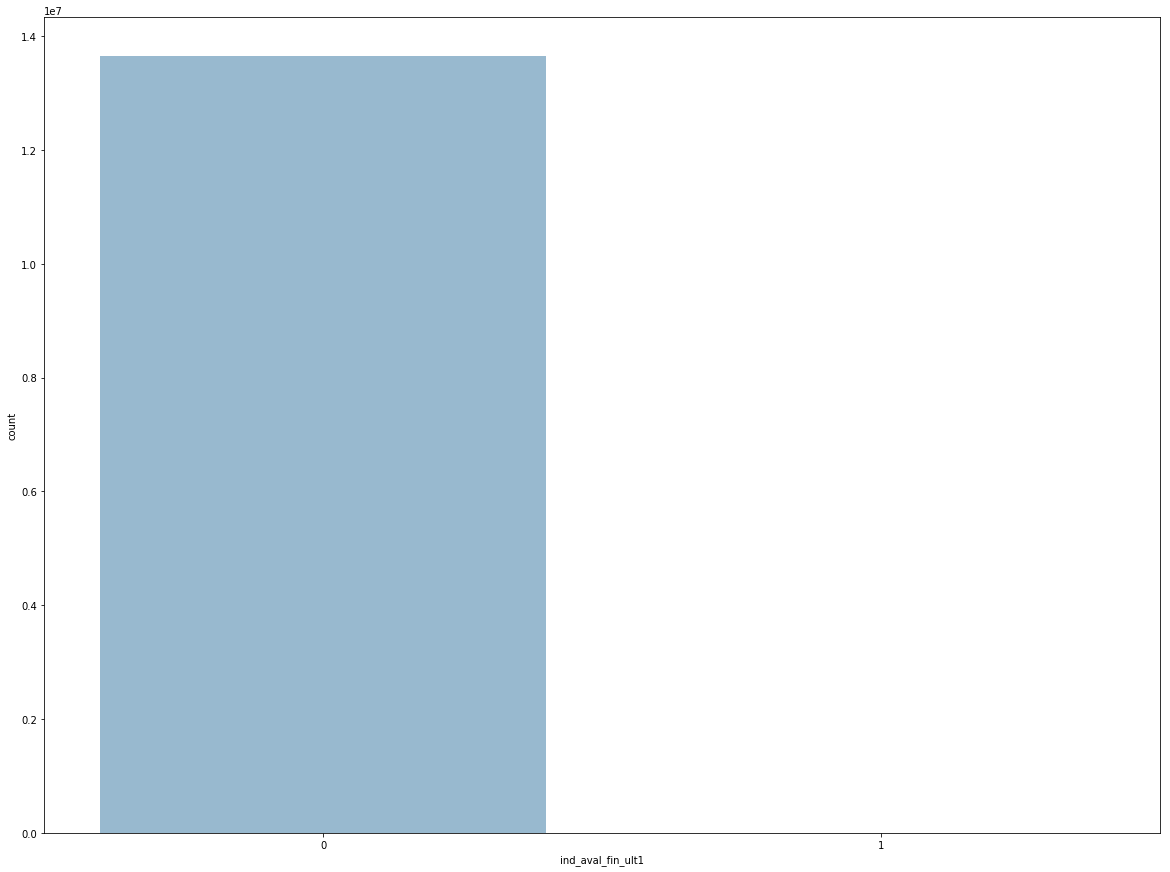

--------------------------------------------------
col :  ind_cco_fin_ult1


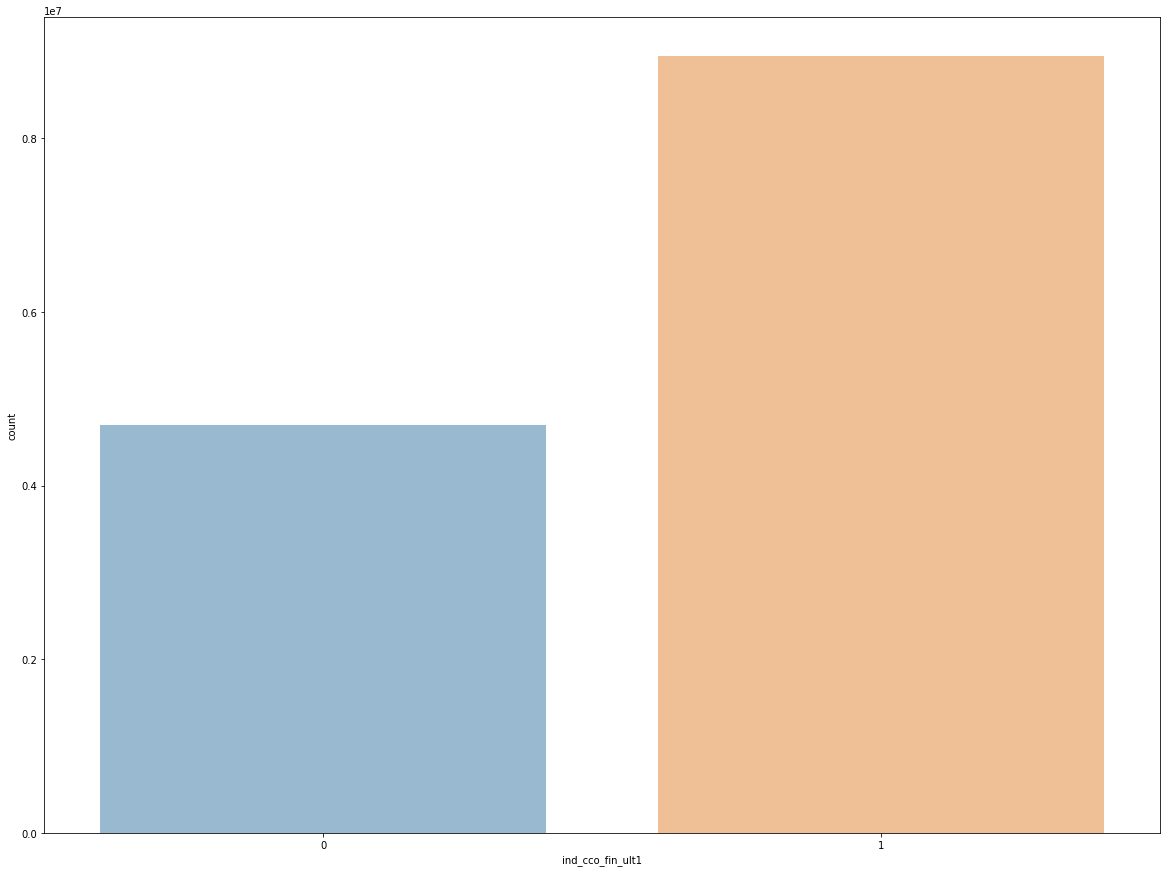

--------------------------------------------------
col :  ind_cder_fin_ult1


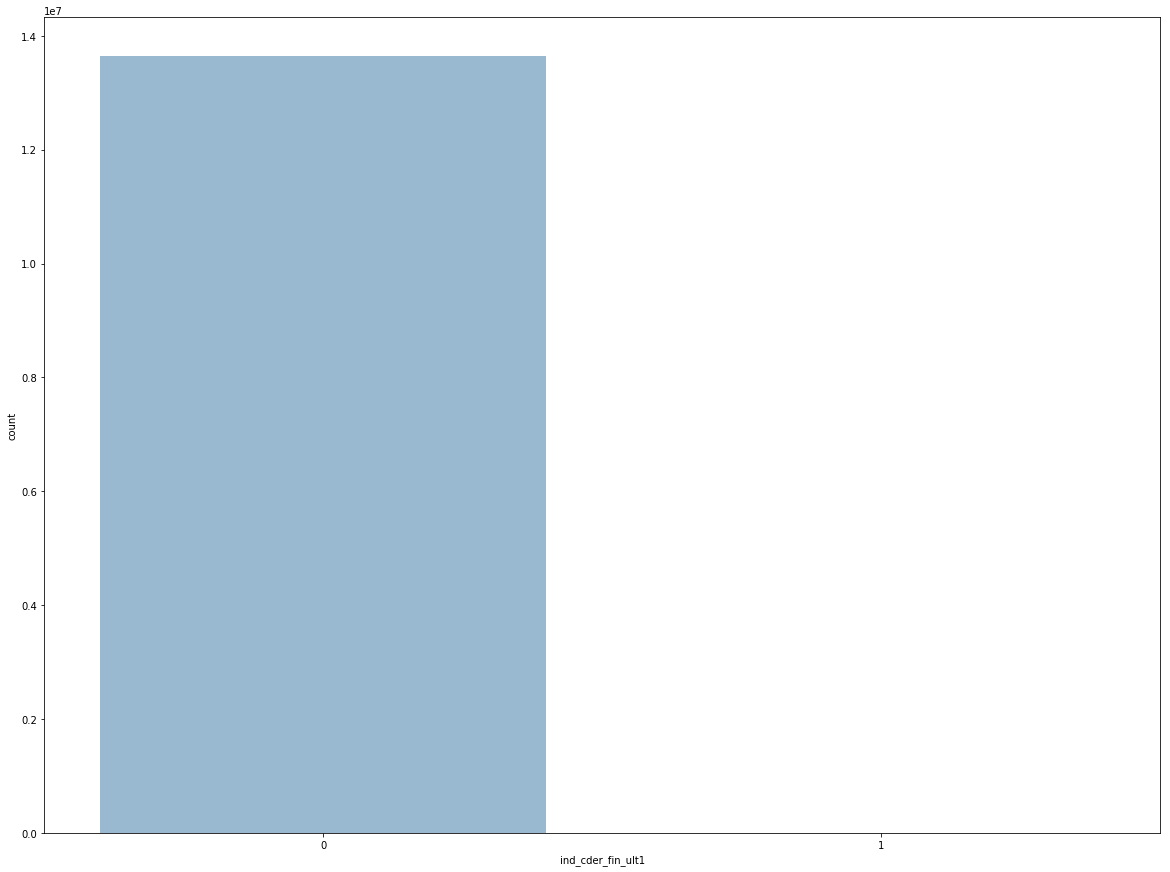

--------------------------------------------------
col :  ind_cno_fin_ult1


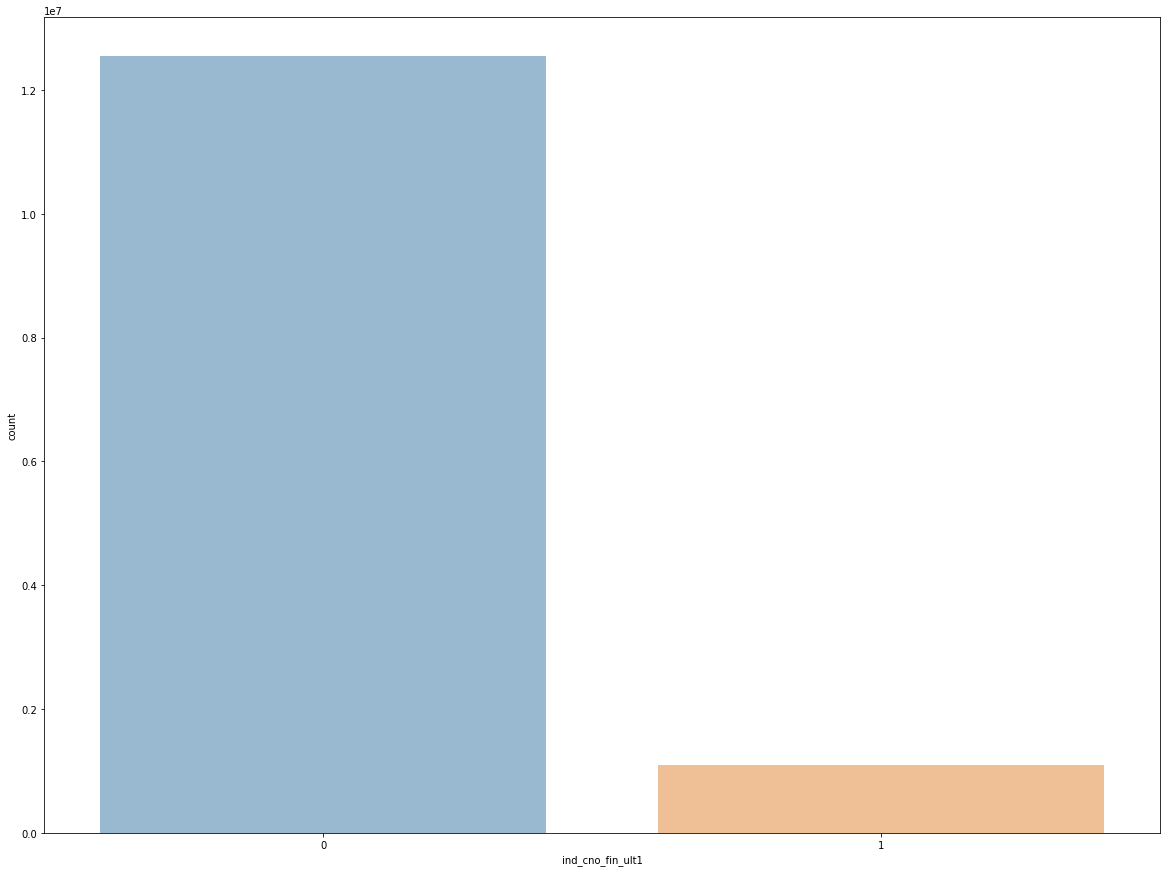

--------------------------------------------------
col :  ind_ctju_fin_ult1


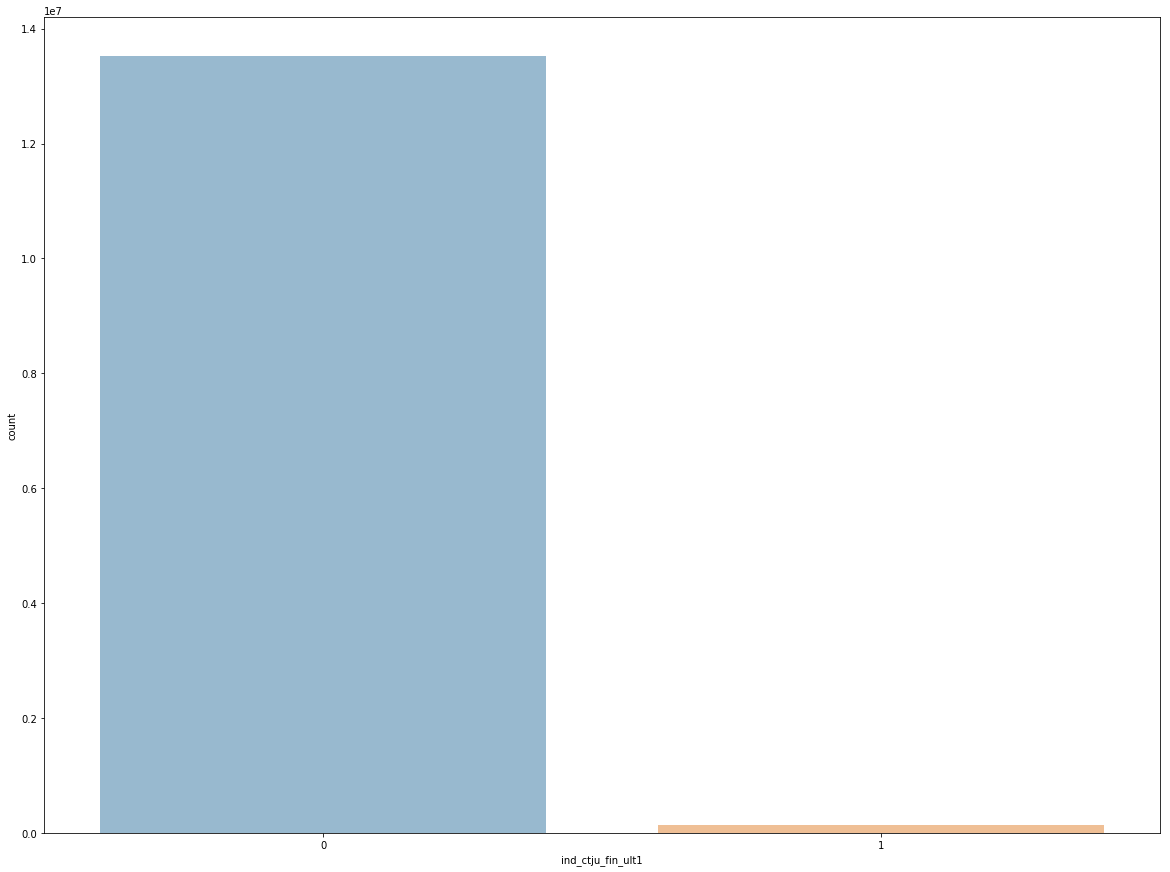

--------------------------------------------------
col :  ind_ctma_fin_ult1


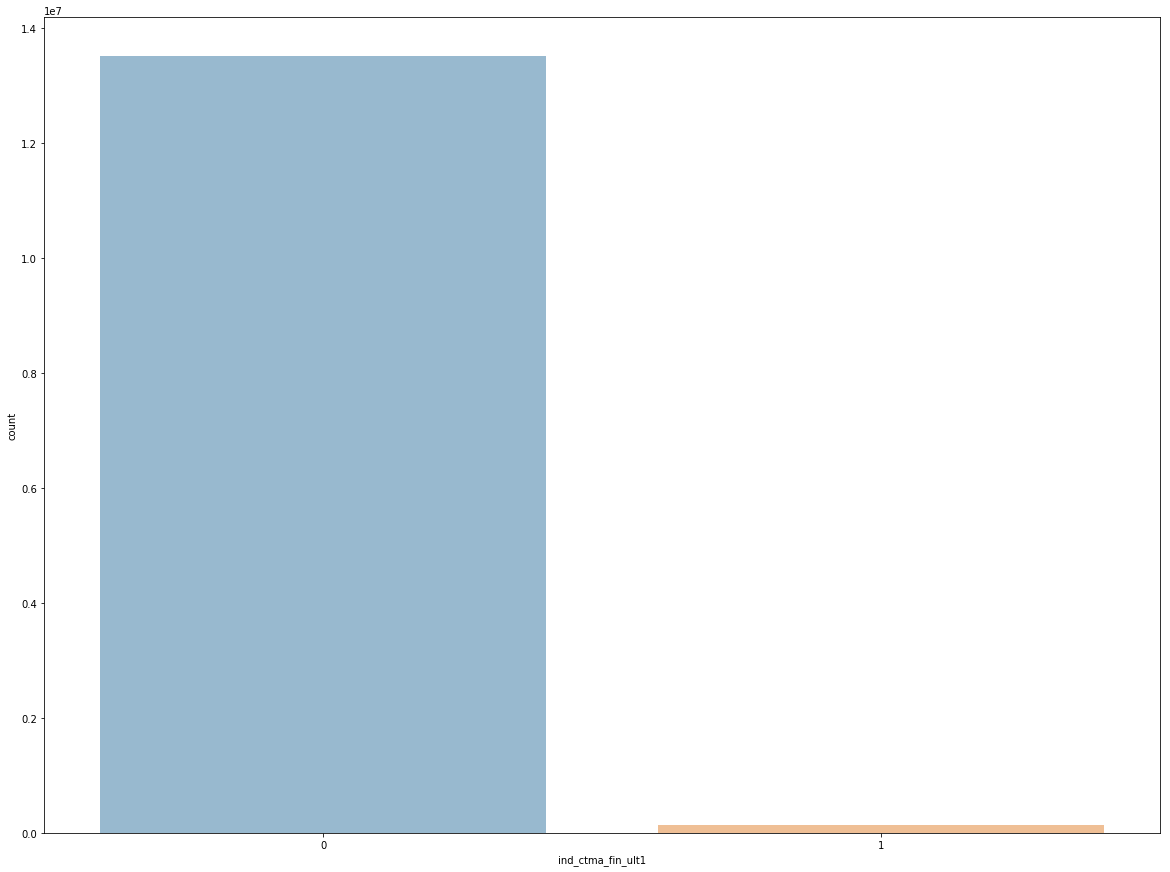

--------------------------------------------------
col :  ind_ctop_fin_ult1


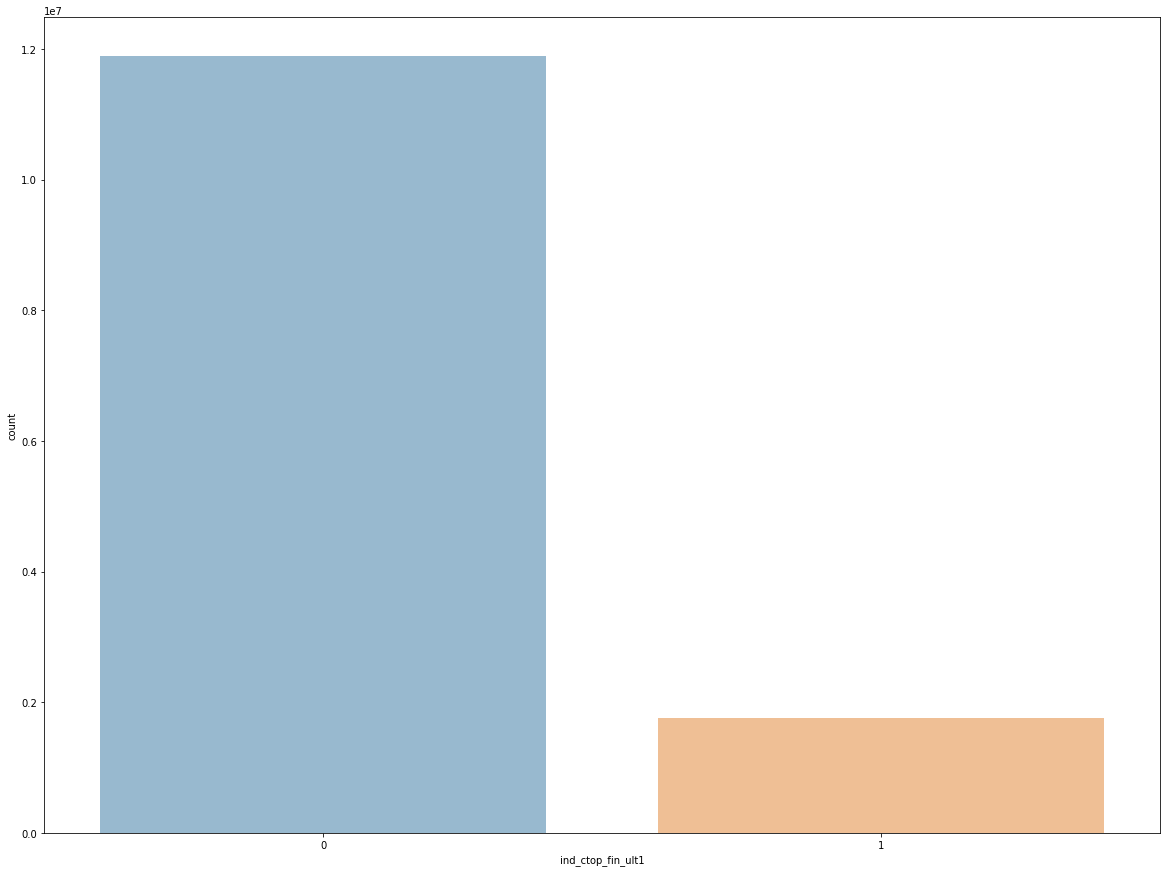

--------------------------------------------------
col :  ind_ctpp_fin_ult1


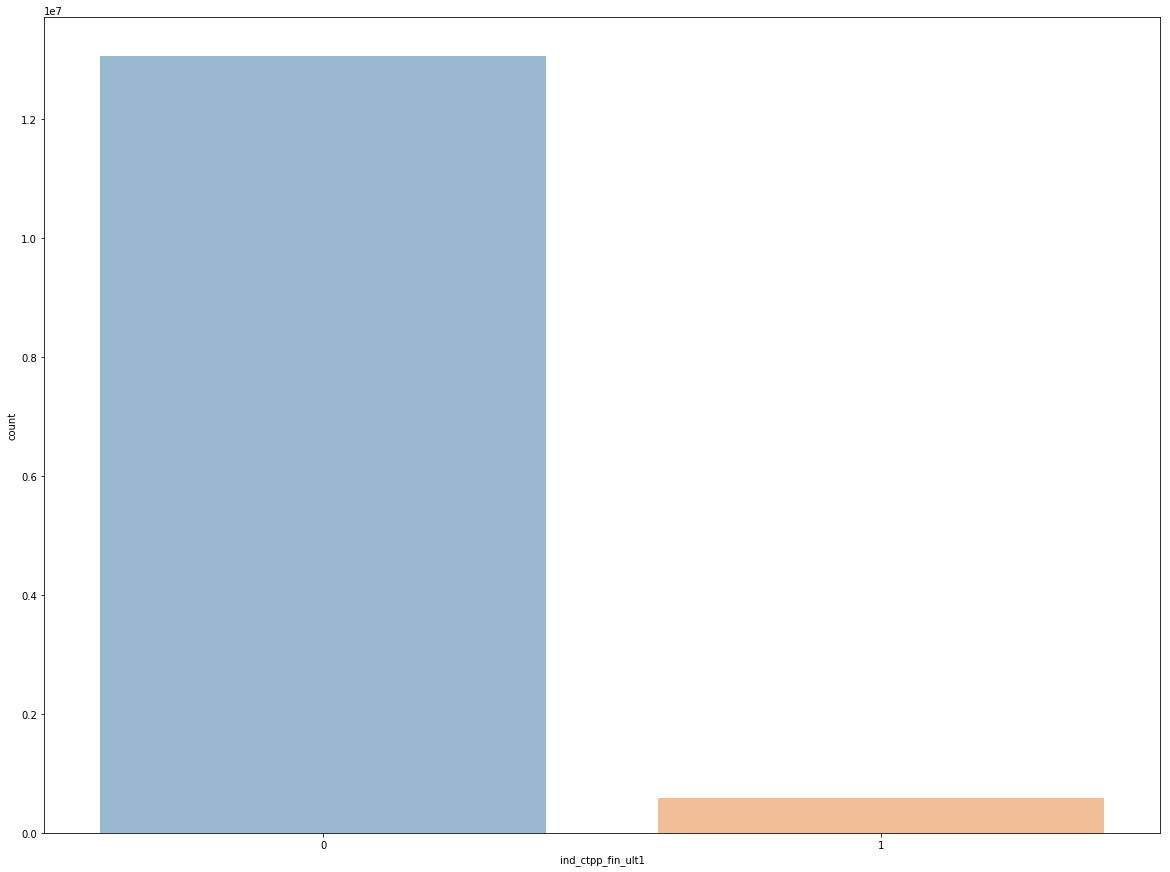

--------------------------------------------------
col :  ind_deco_fin_ult1


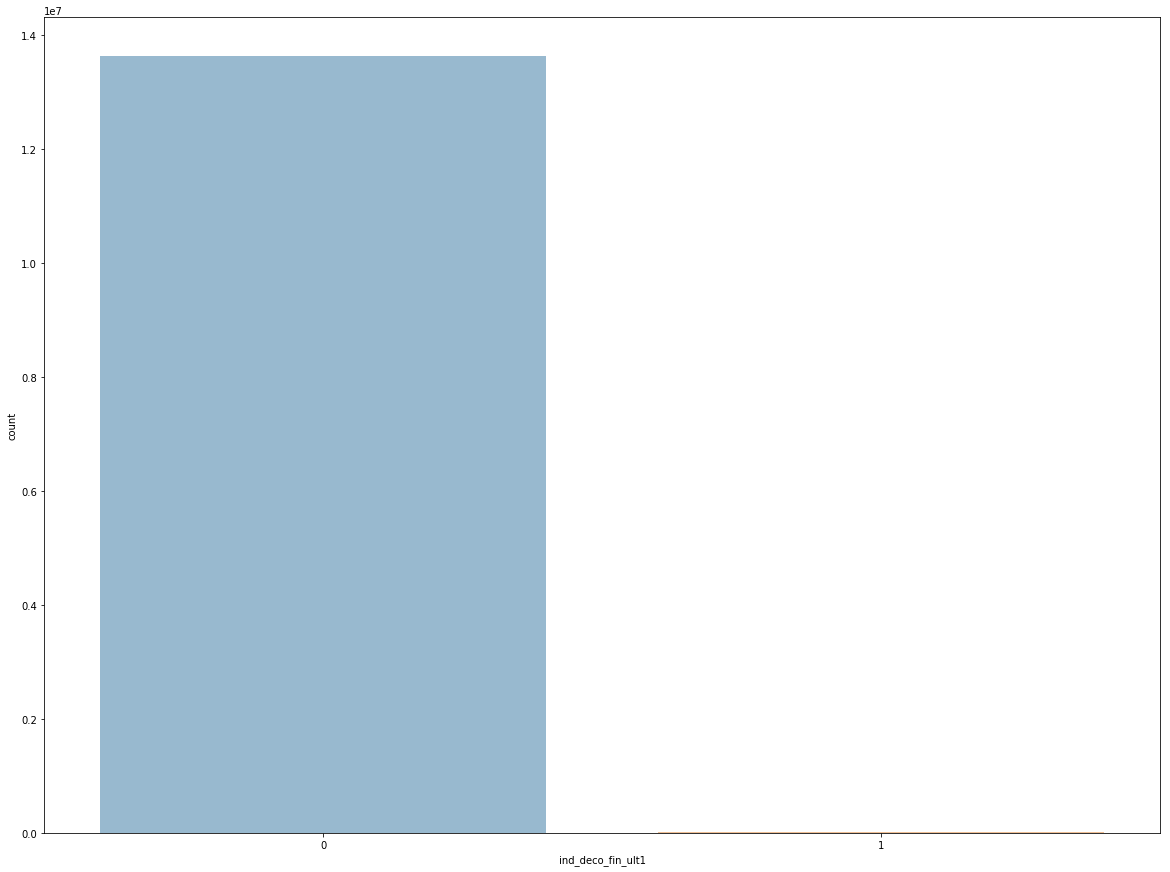

--------------------------------------------------
col :  ind_deme_fin_ult1


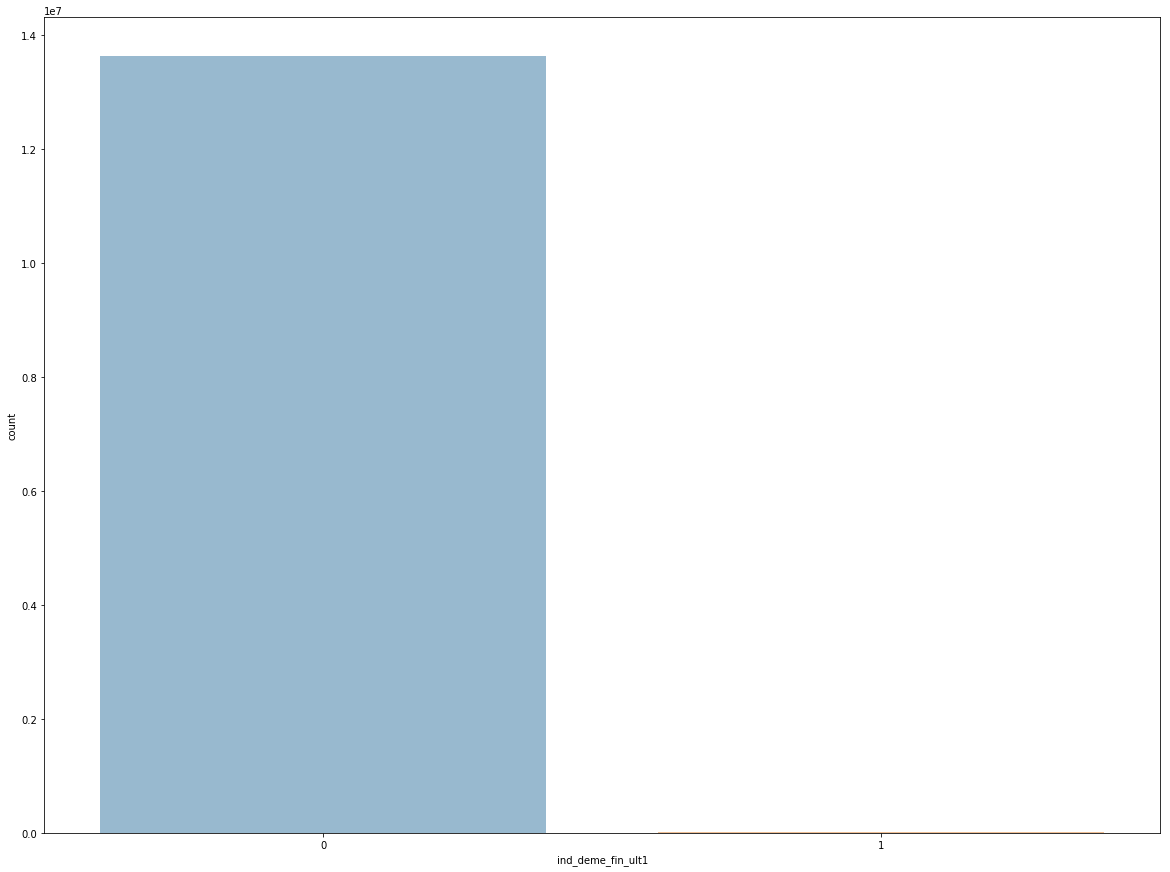

--------------------------------------------------
col :  ind_dela_fin_ult1


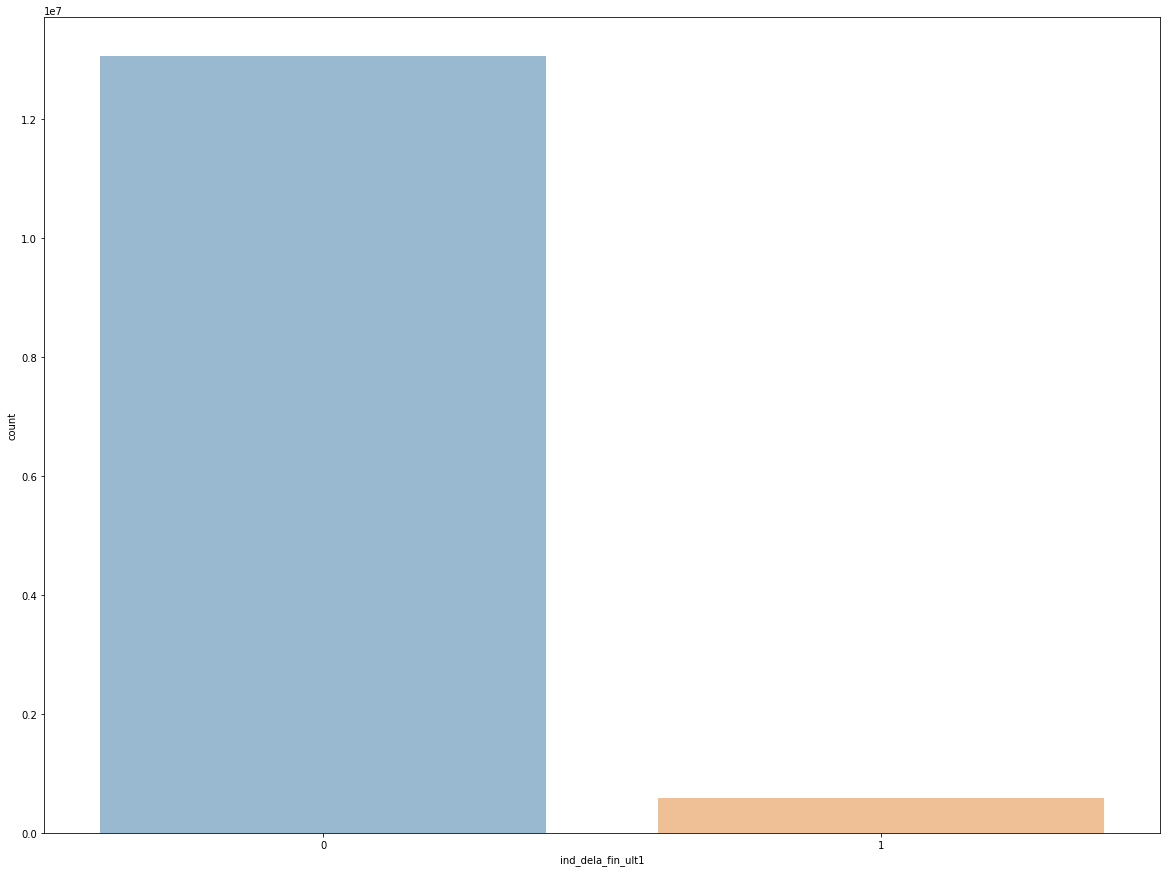

--------------------------------------------------
col :  ind_ecue_fin_ult1


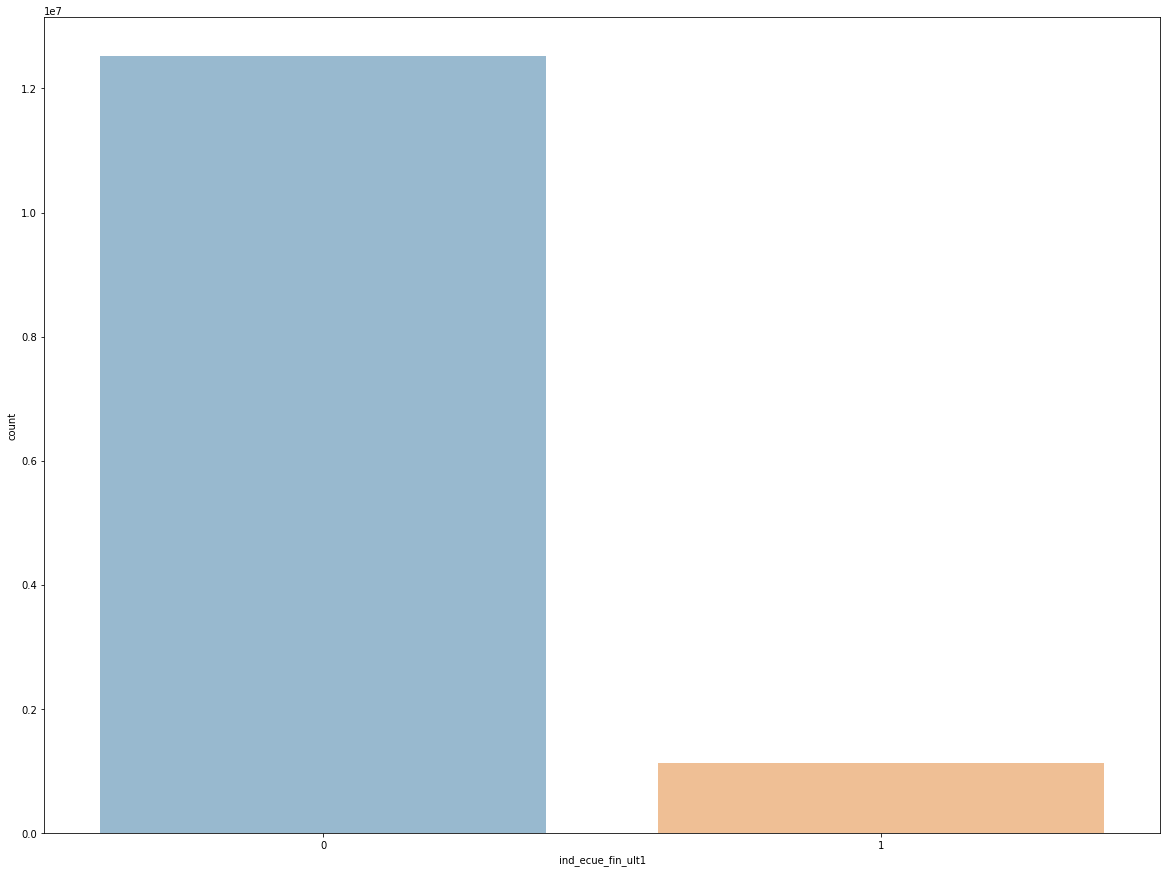

--------------------------------------------------
col :  ind_fond_fin_ult1


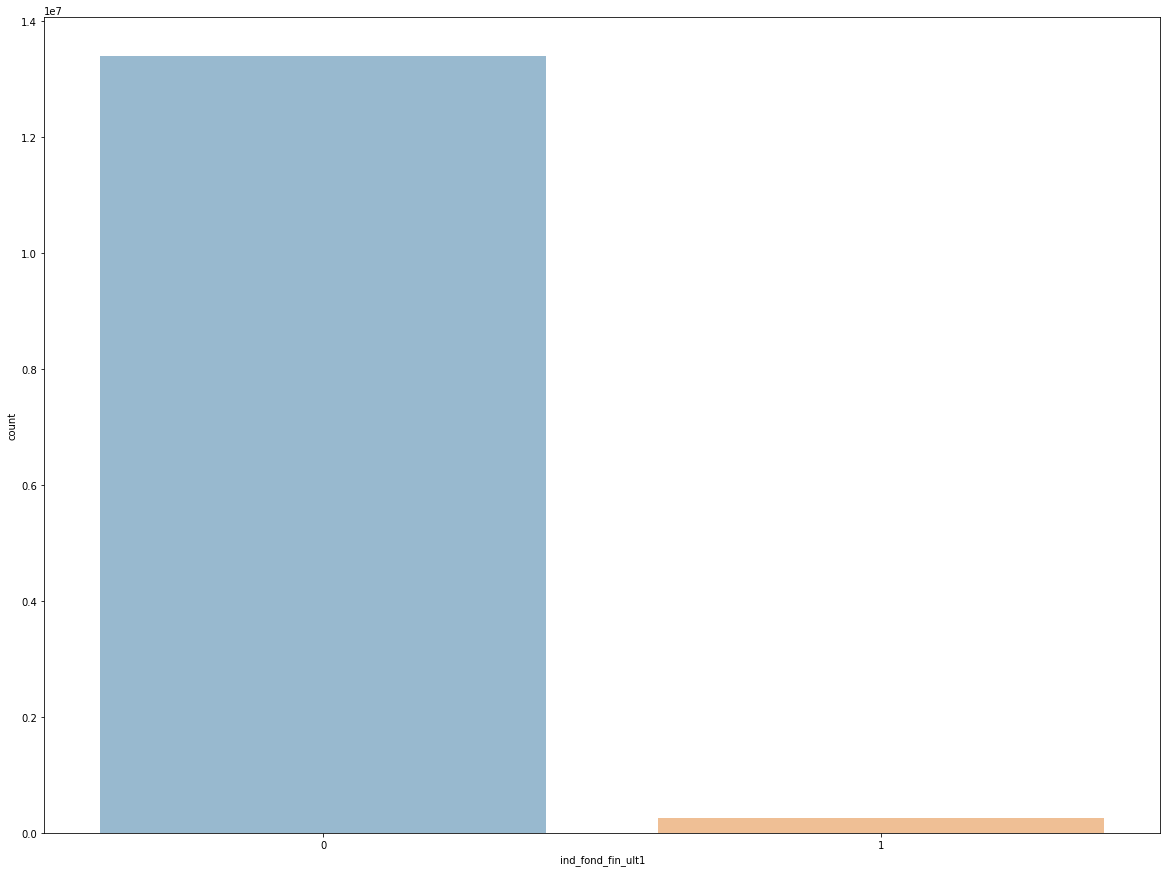

--------------------------------------------------
col :  ind_hip_fin_ult1


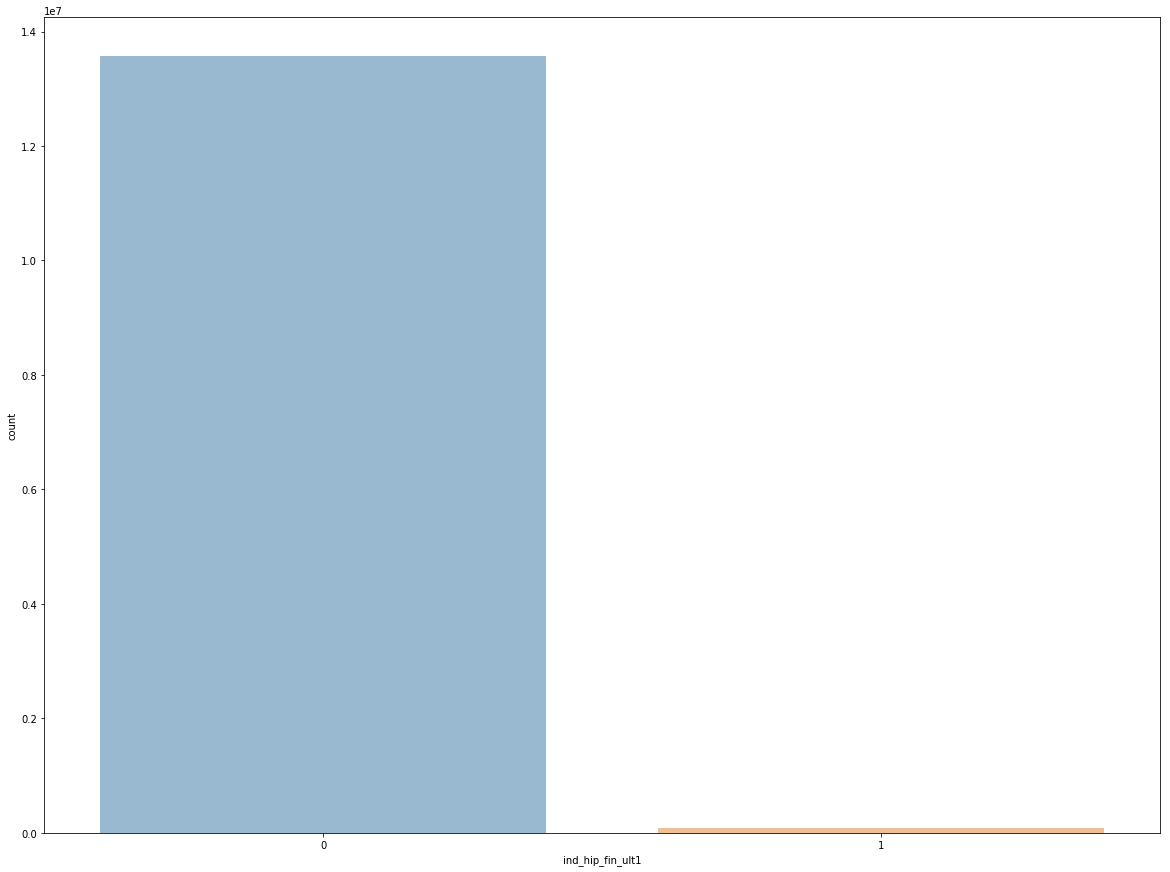

--------------------------------------------------
col :  ind_plan_fin_ult1


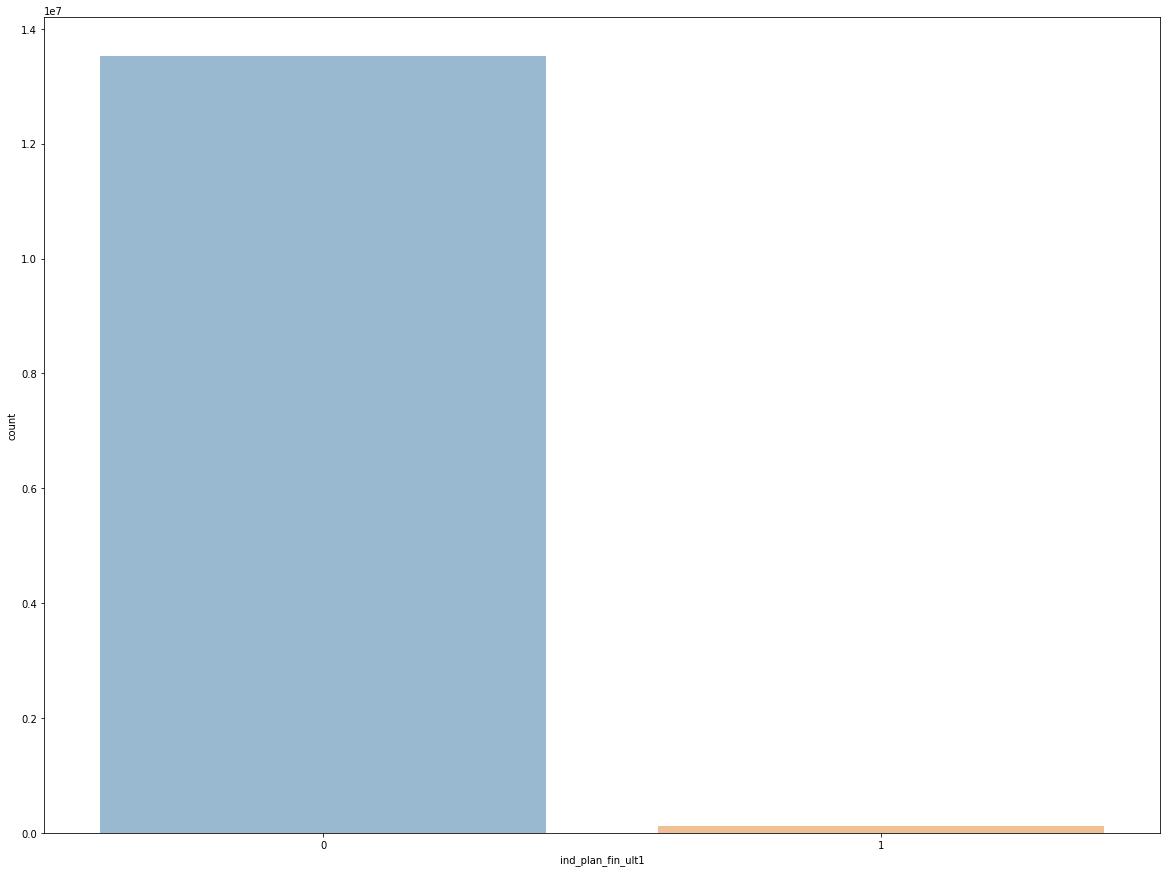

--------------------------------------------------
col :  ind_pres_fin_ult1


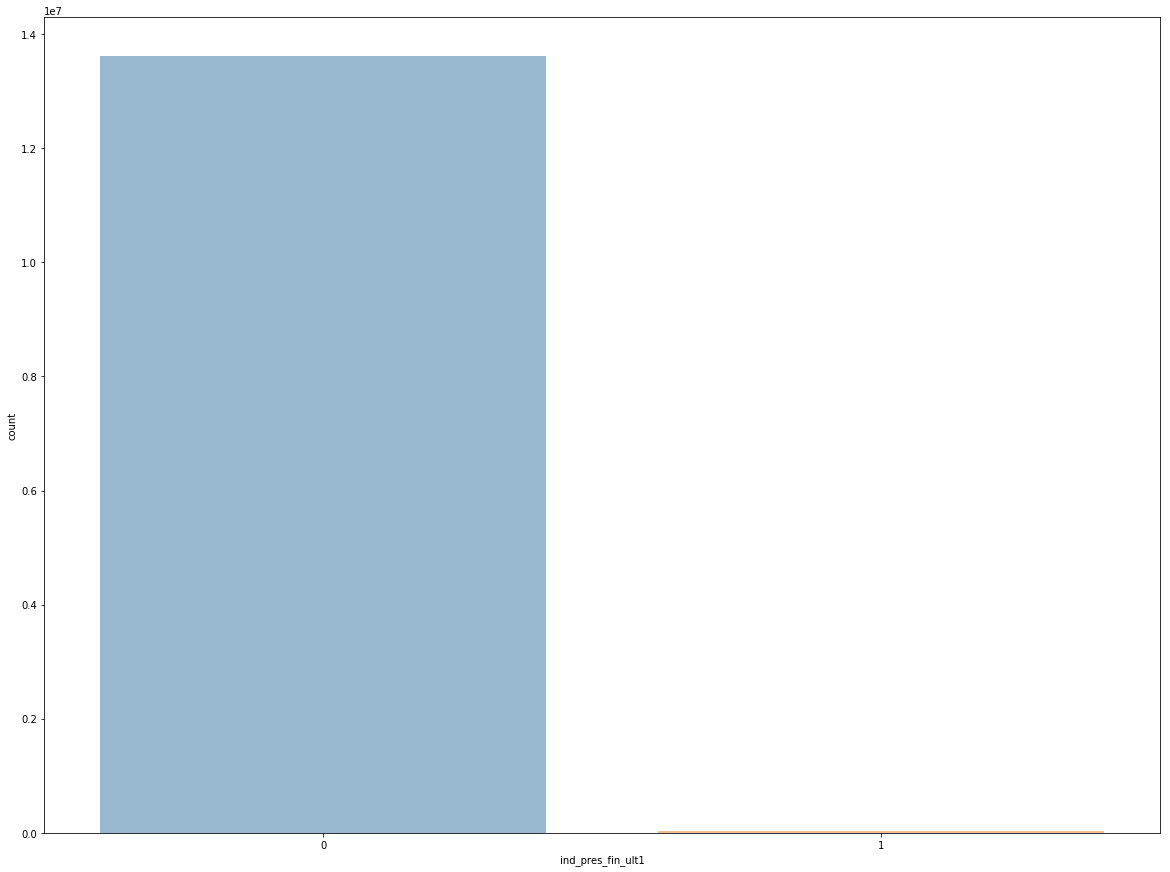

--------------------------------------------------
col :  ind_reca_fin_ult1


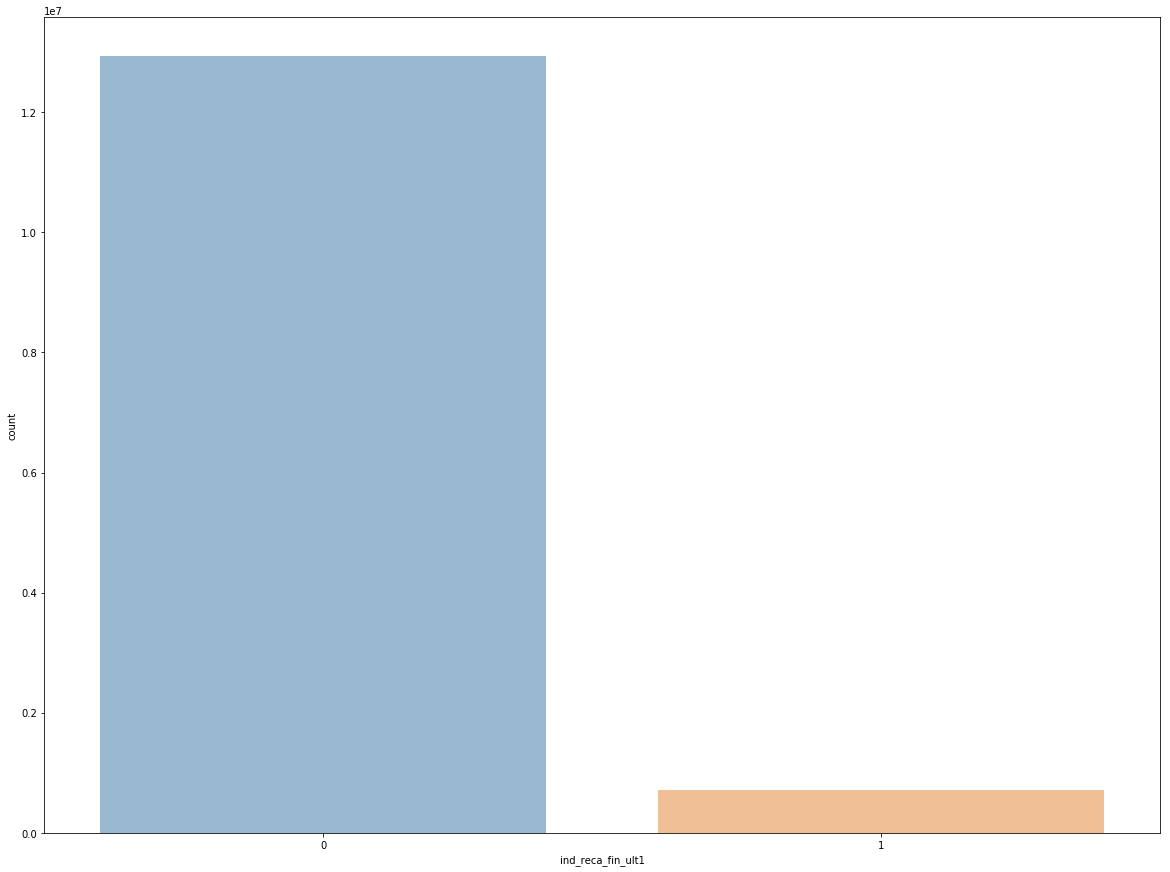

--------------------------------------------------
col :  ind_tjcr_fin_ult1


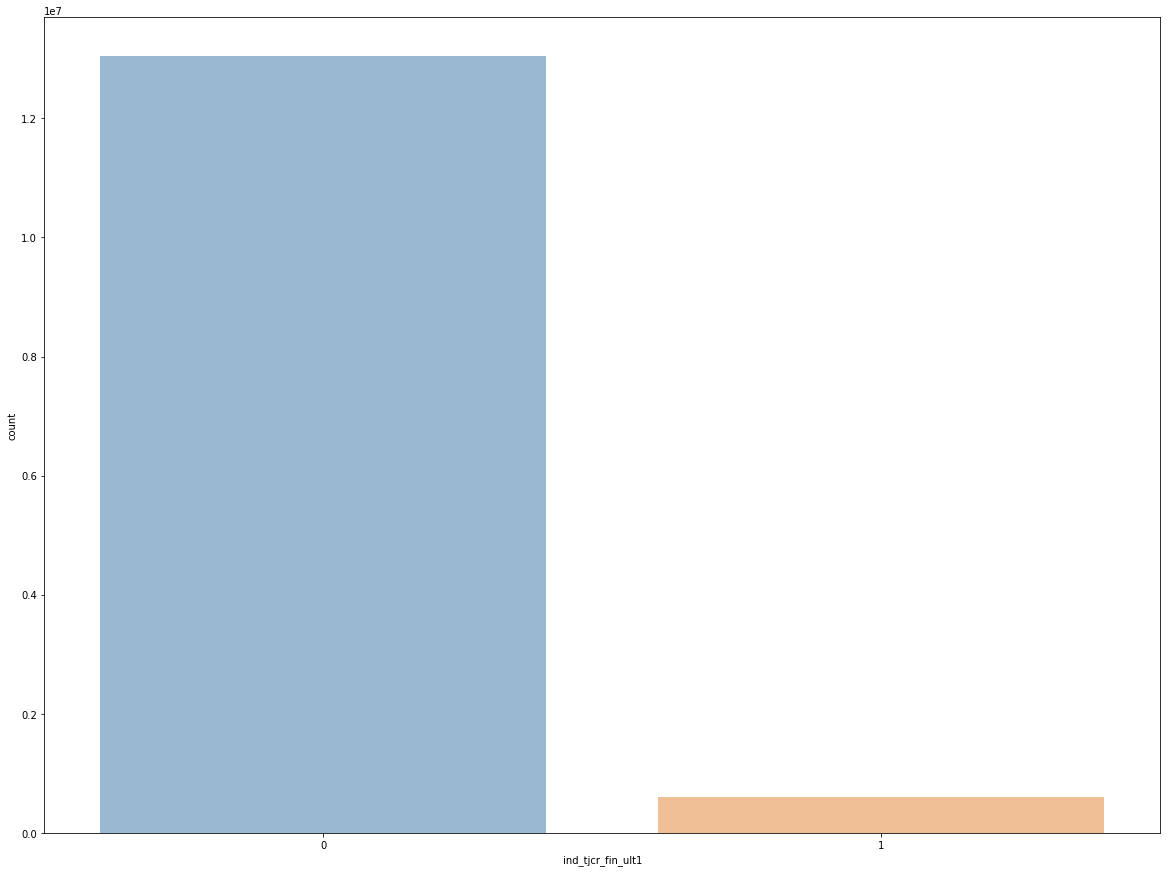

--------------------------------------------------
col :  ind_valo_fin_ult1


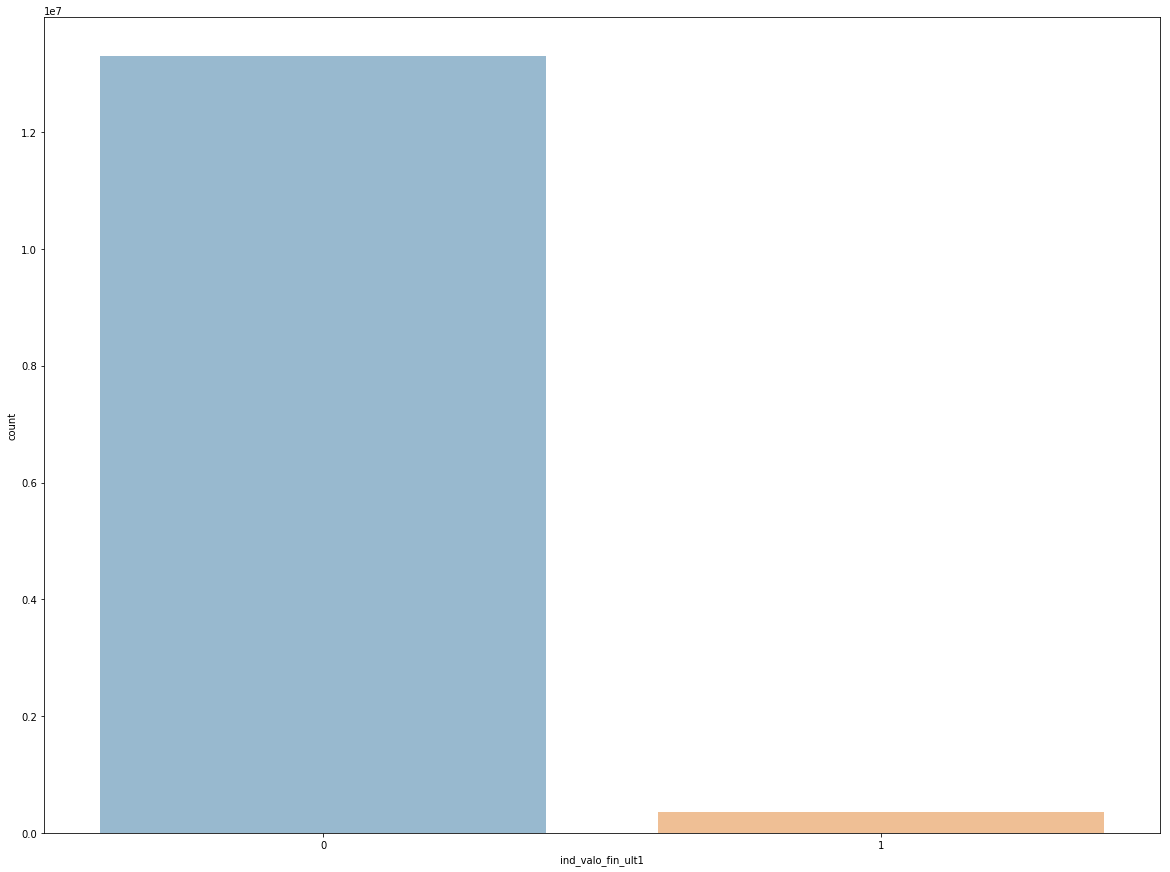

--------------------------------------------------
col :  ind_viv_fin_ult1


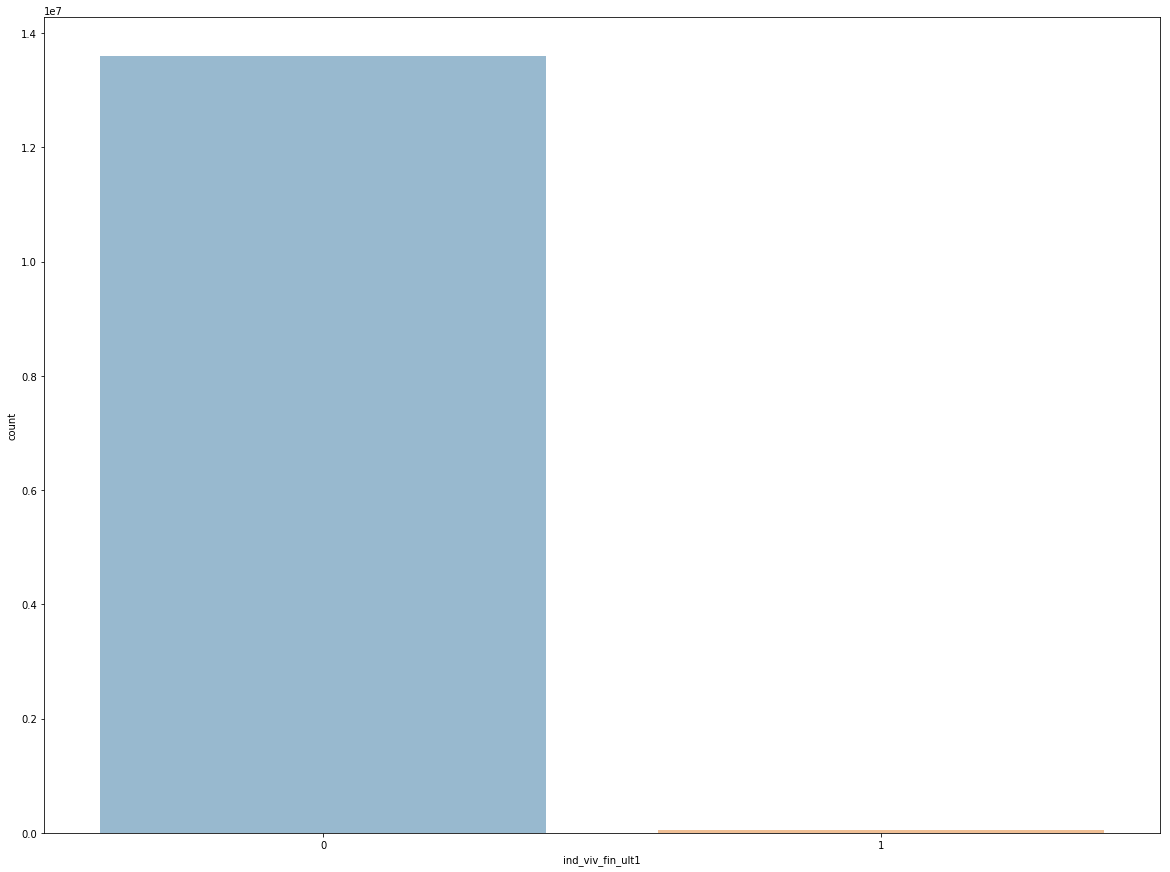

--------------------------------------------------
col :  ind_nomina_ult1


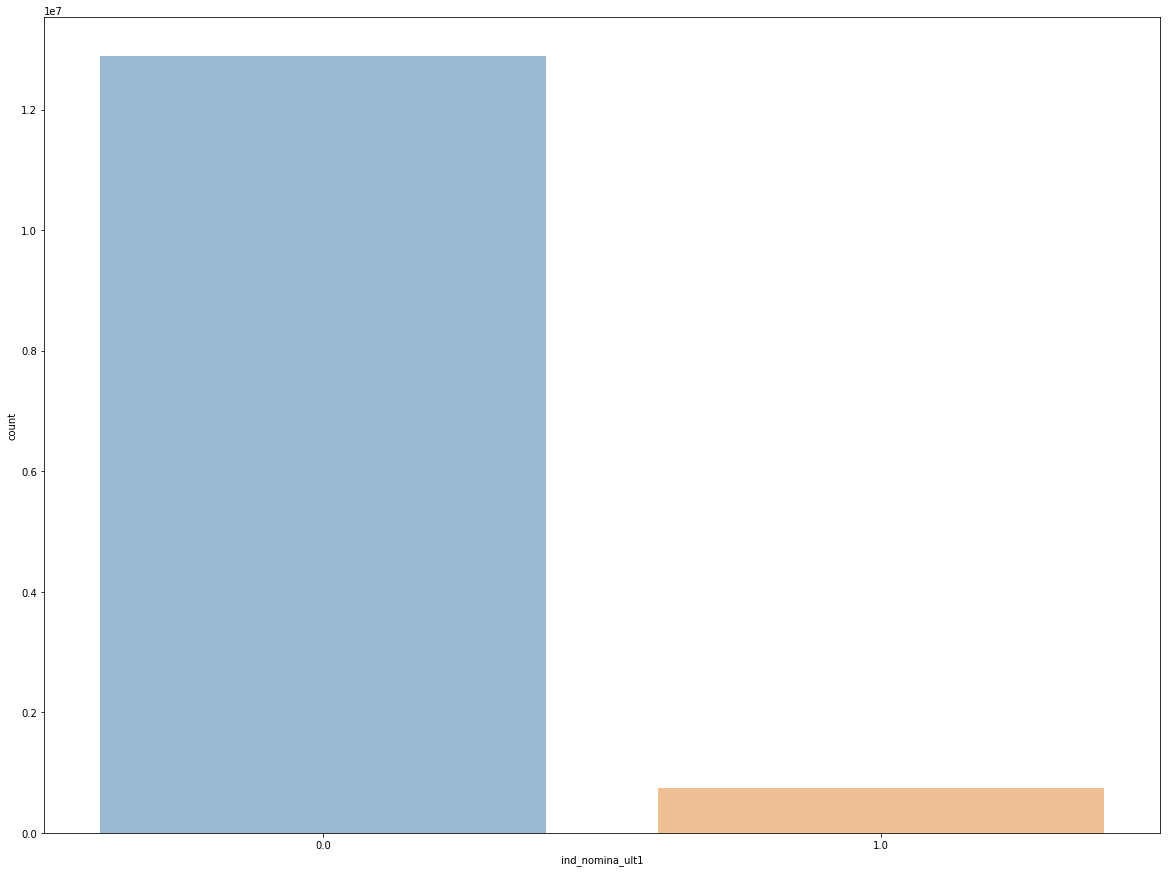

--------------------------------------------------
col :  ind_nom_pens_ult1


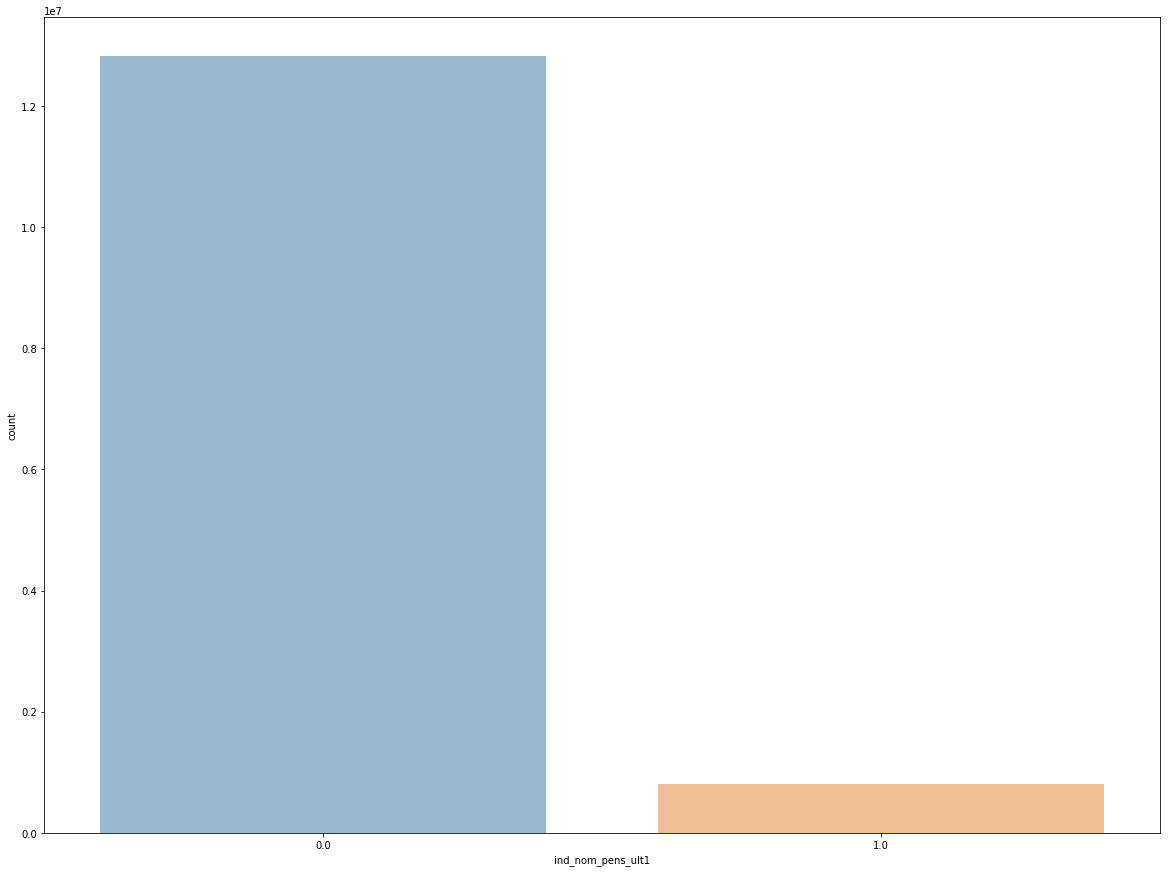

--------------------------------------------------
col :  ind_recibo_ult1


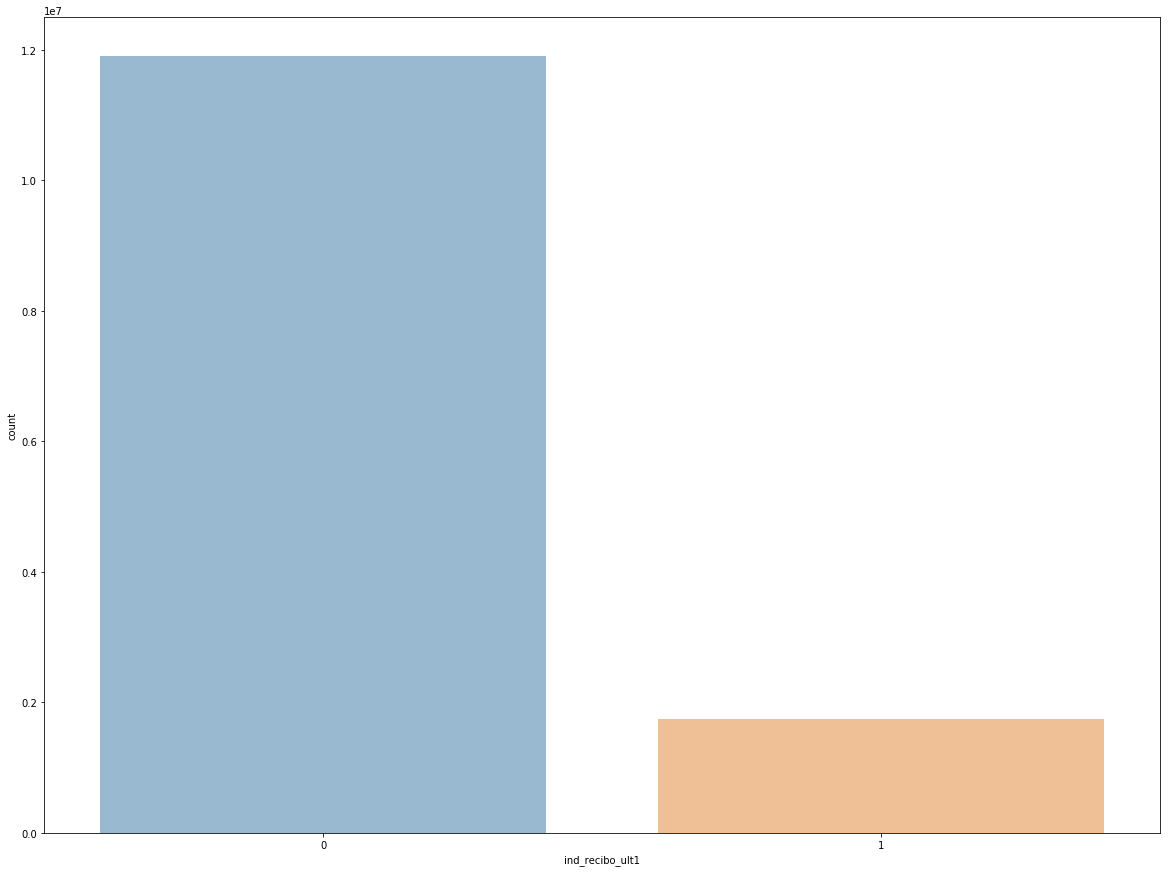

In [28]:
skip_cols = ['ncodpers', 'renta']

for col in train.columns:
  # skip
  if col in skip_cols:
    continue

  print('-' * 50)
  print('col : ', col)

  # 그래프 크기(figsize) 설정
  f, ax = plt.subplots(figsize=(20, 15))
  # seaborn을 사용. 막대 그래프 생성
  sns.countplot(x=col, data=train, alpha=0.5)
  # 시각화
  plt.show()

###2.3.2. 시계열 데이터 시각화

####2.3.2.1. 월별 금융 제품 보유 데이터를 누적 막대 그래프로 시각화

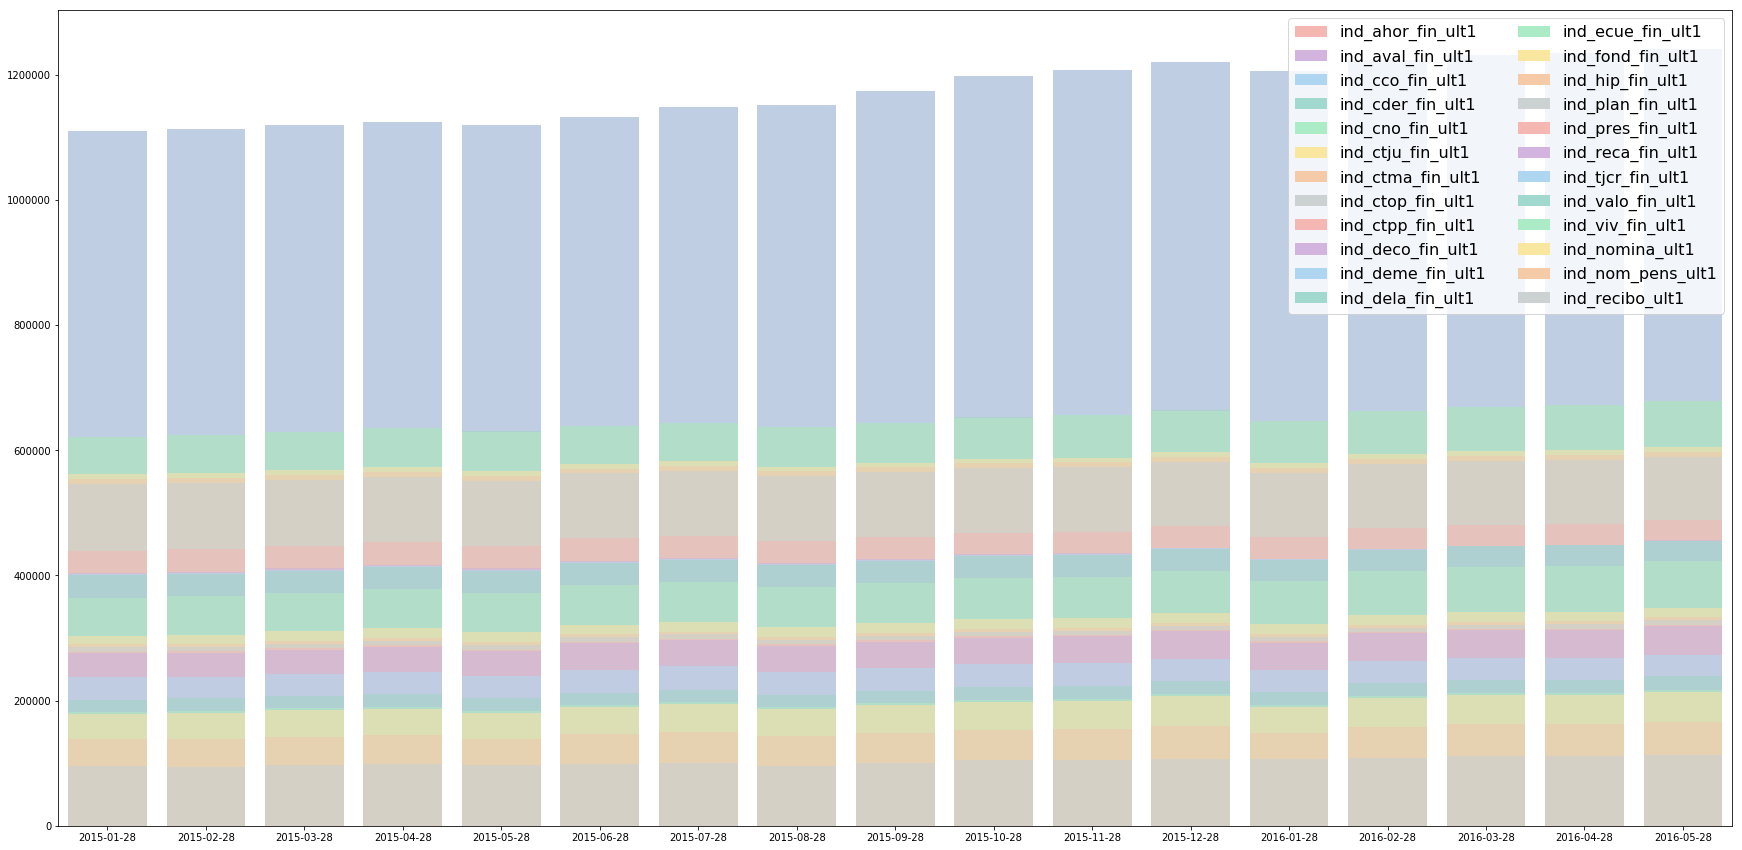

In [43]:
# 날짜 데이터를 기준으로 분석, 날자 데이터를 별도로 추출
months = train['fecha_dato'].unique().tolist()
# 제품 24개 추출
label_cols = train.columns[24:].tolist()

label_over_time = []
for i in range(len(label_cols)):
  # 매월 각 제품의 총합을 groupby(..).agg('sum')으로 계산하여, label_sum에 저장
  label_sum = train.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
  label_over_time.append(label_sum.tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
  # 누적 막대 그래프를 시각화하기 위하여, n번째 제품의 총합을 1 ~ n번째 제품의 총합으로 만듬
  label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

# 시각화를 위하여 색깔을 지정
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

# 그림 크기를 사전에 정의
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
  # 24개 제품에 대하여 Histogram을 그린다.
  # x축에는 월 데이터, y축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha값은 0.7로 지정
  sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)

# 우측 상단에 Legend를 추가
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

####2.3.2.2. 절댓값이 아닌 월별 상대값으로 시각화하여 시각적으로 보기 쉽게 표현

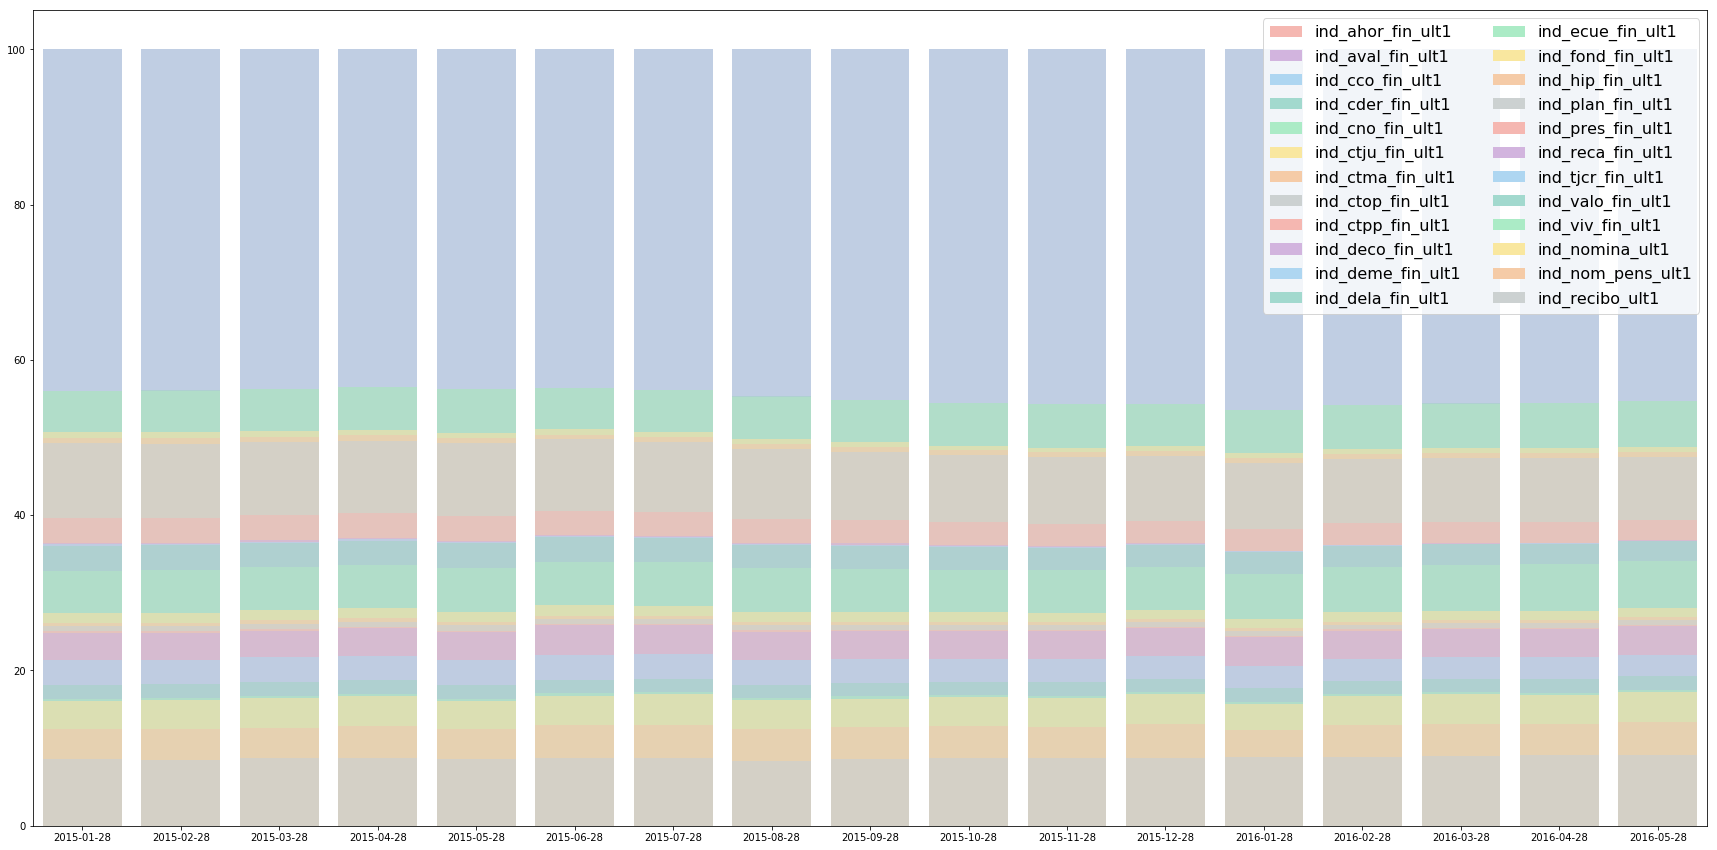

In [48]:
# label_sum_over_time의 값을 퍼센트 단위로 변환. 월마다 최댓값으로 나누고 100을 곱해줌
label_sum_percent = (label_sum_over_time / (1. * np.asarray(label_sum_over_time).max(axis=0))) * 100

# 그림 크기를 사전에 정의
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
  # 24개 제품에 대하여 Histogram을 그린다.
  # x축에는 월 데이터, y축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha값은 0.7로 지정
  sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)

# 우측 상단에 Legend를 추가
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})
